In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
IS_GAP = False

In [3]:
notebook_home = os.path.abspath('')
stat_results = os.path.join(notebook_home, "stat_results") if IS_GAP else os.path.join(notebook_home, "stat_results_nogap")
lookup_results = os.path.join(notebook_home, "lookup_results") if IS_GAP else os.path.join(notebook_home, "lookup_results_nogap")
modify_results = os.path.join(notebook_home, "modify_results") if IS_GAP else os.path.join(notebook_home, "modify_results_nogap")
enron_stat, github_stat = os.path.join(stat_results, "enron", "output"), os.path.join(stat_results, "github", "output")
enron_lookup, github_lookup = os.path.join(lookup_results, "enron", "output"), os.path.join(lookup_results, "github", "output")
enron_modify, github_modify = os.path.join(modify_results, "enron", "output"), os.path.join(modify_results, "github", "output")

In [103]:
GRAPH_COLOR = cm.YlGnBu
color_dict = {
    "TACO": GRAPH_COLOR(90),
    "NoComp": GRAPH_COLOR(190),
    "Antifreeze": GRAPH_COLOR(250)
}
#rcParams['font.family'] = 'Serif'
legend_size = 40
label_size = 50
tick_size = 50
fig_width = 16
fig_height = 10

In [5]:
def get_pdf_df(df, column_name, is_log=True):
    ls = [x for x in df[column_name] if x > 10]
    length = len(ls)
    if is_log:
        data = pd.Series(np.log10(ls))
    else:
        data = pd.Series(ls)
    freq = data.value_counts().sort_index(axis=0, ascending=True).reset_index() 
    freq[0] = freq[0] / length
    freq['cumsum'] = np.cumsum(freq[0])
    return freq

In [6]:
def convert_upper_str(num):
    upper_ls = '⁰¹²³⁴⁵⁶⁷⁸⁹'
    index = int(np.log10(num))
    return str(10) + upper_ls[int(np.log10(num))]

In [7]:
def plot_percentile(df_ls, 
                    legend_ls, 
                    xlabel, 
                    ylabel, 
                    x_tick_min,
                    x_tick_max,
                    x_tick_num,
                    fig_size=(fig_width, fig_height),
                    legend_size=legend_size,
                    tick_size=tick_size,
                    label_size=label_size,
                    color_dict=color_dict,
                    save_path=None):
    assert len(df_ls) == len(legend_ls)
    fig, ax = plt.subplots(figsize=fig_size)
    for i in range(len(df_ls)):
        df, label = df_ls[i], legend_ls[i]
        ax.plot(df['index'], df['cumsum'], label=label, color=color_dict[label], linewidth=4.0)
    
    ax.set_xlabel(xlabel, fontsize=label_size)
    ax.set_ylabel(ylabel, fontsize=label_size)
    x_ticks = np.arange(x_tick_min, x_tick_max+0.1, step=(x_tick_max - x_tick_min)/x_tick_num).astype(int)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([convert_upper_str(10**x) for x in x_ticks], fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    ax.legend(fontsize=legend_size, loc="upper left")
    fig.tight_layout()
    
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

In [8]:
def plot_percentile_transpose(df_ls, 
                    legend_ls, 
                    xlabel, 
                    ylabel, 
                    y_tick_min,
                    y_tick_max,
                    y_tick_num,
                    fig_size=(fig_width, fig_height),
                    legend_size=legend_size,
                    tick_size=tick_size,
                    label_size=label_size,
                    color_dict=color_dict,
                    save_path=None):
    
    assert len(df_ls) == len(legend_ls)
    fig, ax = plt.subplots(figsize=fig_size)
    for i in range(len(df_ls)):
        df, label = df_ls[i], legend_ls[i]
        ax.plot(df['cumsum'], df['index'], label=label, color=color_dict[label], linewidth=4.0)
    
    ax.set_xlabel(xlabel, fontsize=label_size)
    ax.set_ylabel(ylabel, fontsize=label_size)
    y_ticks = np.arange(y_tick_min, y_tick_max+0.1, step=(y_tick_max - y_tick_min)/y_tick_num).astype(int)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([convert_upper_str(10**x) for x in y_ticks], fontsize=tick_size)
    plt.xticks(fontsize=tick_size)
    ax.legend(fontsize=legend_size, loc="upper left")
    fig.tight_layout()
    
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

In [133]:
def plot_bar_chart(df,
                   file_list,
                   label_column_dict,
                   xlabel,
                   ylabel,
                   y_tick_min,
                   y_tick_max,
                   y_tick_num,
                   bar_width=0.25,
                   fig_size=(fig_width, fig_height),
                   legend_size=legend_size,
                   tick_size=tick_size,
                   label_size=label_size,
                   color_dict=color_dict,
                   save_path=None
                  ):
    
    x_ticks = np.arange(len(file_list))
    x_ticks_min, x_ticks_max = 100, -100
    bar_labels = list(label_column_dict.keys())
    num_bars = len(bar_labels)
    fig, ax = plt.subplots(figsize=fig_size)
    for idx, bar_label in enumerate(bar_labels):
        x = x_ticks - ((num_bars - 1) * bar_width)/2 + idx * bar_width
        x_ticks_min = min(x.min(), x_ticks_min)
        x_ticks_max = max(x.max(), x_ticks_max)
        rect = ax.bar(x_ticks - ((num_bars - 1) * bar_width)/2 + idx * bar_width,
                      np.log10(df[label_column_dict[bar_label]].values),
                      bar_width, label=bar_label,
                      color=color_dict[bar_label])
    
    plt.axhline(y=np.log10(5*60*1000), color="r", linewidth=5)
    plt.text(x_ticks_min, np.log10(5*60*1000)-0.1, "DNF", 
             fontsize=50, verticalalignment="top", horizontalalignment="right", color="r")
    
    ax.set_xlabel(xlabel, fontsize=label_size)
    ax.set_ylabel(ylabel, fontsize=label_size)
    
    y_ticks = np.arange(y_tick_min, y_tick_max+0.1, step=(y_tick_max - y_tick_min)/y_tick_num).astype(int)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([convert_upper_str(10**x) for x in y_ticks], fontsize=tick_size)
    
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(file_list, fontsize=tick_size, rotation=45)
    ax.legend(fontsize=legend_size, loc="upper right")
    fig.tight_layout()
    
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

# 1. Compressed Formula Graph Sizes

In [9]:
def graph_compare_preprocess(df, is_inrow=False):
    df['Edges_Diff'] = df['numEdges'] - df['numCompEdges']
    df['Edges_Prec'] = df['numCompEdges'] / df['numEdges']
    if not is_inrow:
        pattern_type = ['RR', 'RF', 'FR', 'FF', 'RR-Chain']
        for pattern in pattern_type:
            if pattern != 'RRGap':
                df[pattern + "_Diff"] = df[pattern + "_NoComp"] - df[pattern + "_Comp"]
            else:
                df[pattern + "_Diff"] = 0
                gaps = ['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven']
                for gap in gaps:
                    pattern_name = pattern + gap
                    df[pattern + "_Diff"] += (df[pattern_name + "_NoComp"] - df[pattern_name + "_Comp"])
    return df

In [10]:
df_enron_stat = graph_compare_preprocess(pd.read_csv(enron_stat + "/" + "enron_taco_dollar_stat.csv"))
df_github_stat = graph_compare_preprocess(pd.read_csv(github_stat + "/" + "github_taco_dollar_stat.csv"))
df_enron_inrow_stat = graph_compare_preprocess(pd.read_csv(enron_stat + "/" + "enron_taco_inrow_stat.csv"), True)
df_github_inrow_stat = graph_compare_preprocess(pd.read_csv(github_stat + "/" + "github_taco_inrow_stat.csv"), True)

In [11]:
df_enron_stat.head()

,fileName,numFormulae,numVertices,numEdges,numCompVertices,numCompEdges,graphBuildTime,RR-Chain_Comp,RR-Chain_NoComp,RR_Comp,...,RRGapSeven_NoComp,NoComp_Comp,NoComp_NoComp,Edges_Diff,Edges_Prec,RR_Diff,RF_Diff,FR_Diff,FF_Diff,RR-Chain_Diff
0,chris_germany_000_1_2.pst.1111.xls,8270,27200,26350,11520,11160,1967,0,0,11160,...,0,0,0,15190,0.423529,15190,0,0,0,0
1,chris_germany_000_1_2.pst.1136.xls,1707,54464,52762,23055,22325,2254,0,0,22315,...,0,10,10,30437,0.423126,30437,0,0,0,0
2,kevin_ruscitti_000_1_1.pst.100.xls,8268,27200,26350,11520,11160,1151,0,0,11160,...,0,0,0,15190,0.423529,15190,0,0,0,0
3,kevin_ruscitti_000_1_1.pst.101.xls,8268,27200,26350,11520,11160,1043,0,0,11160,...,0,0,0,15190,0.423529,15190,0,0,0,0
4,kevin_ruscitti_000_1_1.pst.152.xls,12398,27200,26350,11520,11160,1175,0,0,11160,...,0,0,0,15190,0.423529,15190,0,0,0,0


## 1.1 Formula graph sizes after TACO compression (low is better)

In [12]:
df_graph_enron_compare = pd.DataFrame()
df_graph_enron_compare.index = ['NoComp', 'TACO-Inrow', 'TACO']
df_graph_enron_compare['Vertices'] = [df_enron_stat['numVertices'].sum(), df_enron_inrow_stat['numCompVertices'].sum(), df_enron_stat['numCompVertices'].sum()]
df_graph_enron_compare['Edges'] = [df_enron_stat['numEdges'].sum(), df_enron_inrow_stat['numCompEdges'].sum(), df_enron_stat['numCompEdges'].sum()]
df_graph_enron_compare['Vertices_Percentage'] = df_graph_enron_compare['Vertices'] / df_graph_enron_compare['Vertices'].max()
df_graph_enron_compare['Edges_Percentage'] = df_graph_enron_compare['Edges'] / df_graph_enron_compare['Edges'].max()
df_graph_enron_compare

,Vertices,Edges,Vertices_Percentage,Edges_Percentage
NoComp,18467065,23032538,1.000000,1.000000
TACO-Inrow,7501421,11820157,0.406205,0.513194
TACO,1172585,1182874,0.063496,0.051357


In [13]:
df_graph_github_compare = pd.DataFrame()
df_graph_github_compare.index = ['NoComp', 'TACO-Inrow', 'TACO']
df_graph_github_compare['Vertices'] = [df_github_stat['numVertices'].sum(), df_github_inrow_stat['numCompVertices'].sum(), df_github_stat['numCompVertices'].sum()]
df_graph_github_compare['Edges'] = [df_github_stat['numEdges'].sum(), df_github_inrow_stat['numCompVertices'].sum(), df_github_stat['numCompEdges'].sum()]
df_graph_github_compare['Vertices_Percentage'] = df_graph_github_compare['Vertices'] / df_graph_github_compare['Vertices'].max()
df_graph_github_compare['Edges_Percentage'] = df_graph_github_compare['Edges'] / df_graph_github_compare['Edges'].max()
df_graph_github_compare

,Vertices,Edges,Vertices_Percentage,Edges_Percentage
NoComp,118366859,142266425,1.000000,1.000000
TACO-Inrow,55202070,55202070,0.466364,0.388019
TACO,3423708,3044112,0.028925,0.021397


## 1.2 The number of edges reduced by TACO (high is better)

In [14]:
df_enron_edge_reduce = pd.DataFrame()
df_enron_edge_reduce['TACO-Inrow'] = df_enron_inrow_stat['Edges_Diff']
df_enron_edge_reduce['TACO'] = df_enron_stat['Edges_Diff']
df_enron_edge_reduce.describe().T[['max', '75%', '50%', 'mean']]

,max,75%,50%,mean
TACO-Inrow,142396.0,18200.0,12518.0,18907.893761
TACO,303220.0,36654.0,18317.0,36845.976391


In [15]:
df_github_edge_reduce = pd.DataFrame()
df_github_edge_reduce['TACO-Inrow'] = df_github_inrow_stat['Edges_Diff']
df_github_edge_reduce['TACO'] = df_github_stat['Edges_Diff']
df_github_edge_reduce.describe().T[['max', '75%', '50%', 'mean']]

,max,75%,50%,mean
TACO-Inrow,1693698.0,42760.0,19706.0,45315.060687
TACO,3139011.0,81192.0,33970.0,88171.192527


## 1.3 Remaining edge fractions after compression (low is better)

In [16]:
df_enron_edge_prec = pd.DataFrame()
df_enron_edge_prec['TACO-Inrow'] = df_enron_inrow_stat['Edges_Prec']
df_enron_edge_prec['TACO'] = df_enron_stat['Edges_Prec']
df_enron_edge_prec.describe().T[['min', '25%', '50%', 'mean']]

,min,25%,50%,mean
TACO-Inrow,0.000042,0.063182,0.395909,0.421758
TACO,0.000042,0.004786,0.019305,0.073779


In [17]:
df_github_edge_prec = pd.DataFrame()
df_github_edge_prec['TACO-Inrow'] = df_github_inrow_stat['Edges_Prec']
df_github_edge_prec['TACO'] = df_github_stat['Edges_Prec']
df_github_edge_prec.describe().T[['min', '25%', '50%', 'mean']]

,min,25%,50%,mean
TACO-Inrow,0.000005,0.000994,0.175731,0.364964
TACO,0.000008,0.000667,0.003516,0.034203


## 1.4 Number of edges reduced by each pattern (high is better)

In [18]:
df_enron_pattern_reduce = pd.DataFrame()
pattern_type = ['RR', 'RF', 'FR', 'FF', 'RR-Chain']
for pattern in pattern_type:
    df_enron_pattern_reduce[pattern] = df_enron_stat[pattern + "_Diff"]
df_enron_pattern_stat = pd.DataFrame()
df_enron_pattern_stat.index = df_enron_pattern_reduce.T.index
df_enron_pattern_stat['Sum'] = df_enron_pattern_reduce.sum()
df_enron_pattern_stat['Max'] = df_enron_pattern_reduce.max()
df_enron_pattern_stat

,Sum,Max
RR,16887220,258351
RF,1880,1413
FR,150845,13815
FF,3669403,170541
RR-Chain,566167,24596


In [19]:
df_github_pattern_reduce = pd.DataFrame()
pattern_type = ['RR', 'RF', 'FR', 'FF', 'RR-Chain']
for pattern in pattern_type:
    df_github_pattern_reduce[pattern] = df_github_stat[pattern + "_Diff"]
df_github_pattern_stat = pd.DataFrame()
df_github_pattern_stat.index = df_github_pattern_reduce.T.index
df_github_pattern_stat['Sum'] = df_github_pattern_reduce.sum()
df_github_pattern_stat['Max'] = df_github_pattern_reduce.max()
df_github_pattern_stat

,Sum,Max
RR,109364723.0,2094936.0
RF,3362.0,1107.0
FR,167034.0,39008.0
FF,20639620.0,1043702.0
RR-Chain,5867076.0,399996.0


# 2. Building Graphs

In [20]:
column_list = ['fileName', 'GraphBuildTime']
df_enron_taco_max = pd.read_csv(f"{enron_lookup}/enron_max_taco_10k_1.csv")[column_list]
df_enron_taco_long = pd.read_csv(f"{enron_lookup}/enron_long_taco_10k_1.csv")[column_list]
df_enron_nocomp_max = pd.read_csv(f"{enron_lookup}/enron_max_nocomp_10k_1.csv")[column_list]
df_enron_nocomp_long = pd.read_csv(f"{enron_lookup}/enron_long_nocomp_10k_1.csv")[column_list]
df_github_taco_max =  pd.read_csv(f"{github_lookup}/github_max_taco_10k_1.csv")[column_list]
df_github_taco_long = pd.read_csv(f"{github_lookup}/github_long_taco_10k_1.csv")[column_list]
df_github_nocomp_max = pd.read_csv(f"{github_lookup}/github_max_nocomp_10k_1.csv")[column_list]
df_github_nocomp_long = pd.read_csv(f"{github_lookup}/github_long_nocomp_10k_1.csv")[column_list]

In [21]:
df_enron_taco = pd.merge(df_enron_taco_max, df_enron_taco_long, how="inner", on=["fileName"])
df_enron_nocomp = pd.merge(df_enron_nocomp_max, df_enron_nocomp_long, how="inner", on=["fileName"])
df_enron_taco['TACO_GraphBuildTime'] = (df_enron_taco['GraphBuildTime_x'] + df_enron_taco['GraphBuildTime_y']) / 2.
df_enron_nocomp['NoComp_GraphBuildTime'] = (df_enron_nocomp['GraphBuildTime_x'] + df_enron_nocomp['GraphBuildTime_y']) / 2.

In [22]:
enron_graph_result = pd.merge(df_enron_taco, df_enron_nocomp, how="inner", on=['fileName'])[['fileName', 'TACO_GraphBuildTime', 'NoComp_GraphBuildTime']]

In [23]:
enron_graph_result.head()

,fileName,TACO_GraphBuildTime,NoComp_GraphBuildTime
0,stacey_white_000_1_1.pst.254.xls,1754.5,1002.5
1,darron_c_giron_002_1_1_1.pst.177.xls,650.0,293.5
2,stacey_white_000_1_1.pst.262.xls,3257.0,1975.0
3,mike_grigsby_000_1_1_1.pst.248.xls,150.0,188.0
4,kevin_ruscitti_000_1_1.pst.156.xls,1123.5,239.5


In [24]:
enron_graph_result['TACO_GraphBuildTime'].mean(), enron_graph_result['NoComp_GraphBuildTime'].mean()

(793.4543918918919, 336.4222972972973)

In [25]:
enron_graph_result.sort_values(by="TACO_GraphBuildTime", ascending=False)

,fileName,TACO_GraphBuildTime,NoComp_GraphBuildTime
280,vkaminski_001_1_2_1.pst.62.xls,13329.0,1668.5
220,mark_haedicke_000_1_2.pst.31.xls,5973.0,1762.5
151,gstorey_000_1_1.pst.116.xls,5715.5,2565.5
38,john_lavorato_000_1_1_1.pst.57.xls,5485.5,1727.0
126,phillip_m_love_000_1_1.pst.476.xls,5211.5,1605.0
...,...,...,...
131,richard_shapiro_001_1_2.pst.124.xls,68.5,99.0
298,cooper_richey_000_1_1.pst.30.xls,62.0,66.0
53,john_zufferli_000_1_1.pst.54.xls,61.5,67.0
249,joe_stepenovitch_000_1_1.pst.15.xls,36.0,38.5


In [26]:
freq_enron_taco = get_pdf_df(enron_graph_result, 'TACO_GraphBuildTime')
freq_enron_nocomp = get_pdf_df(enron_graph_result, 'NoComp_GraphBuildTime')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


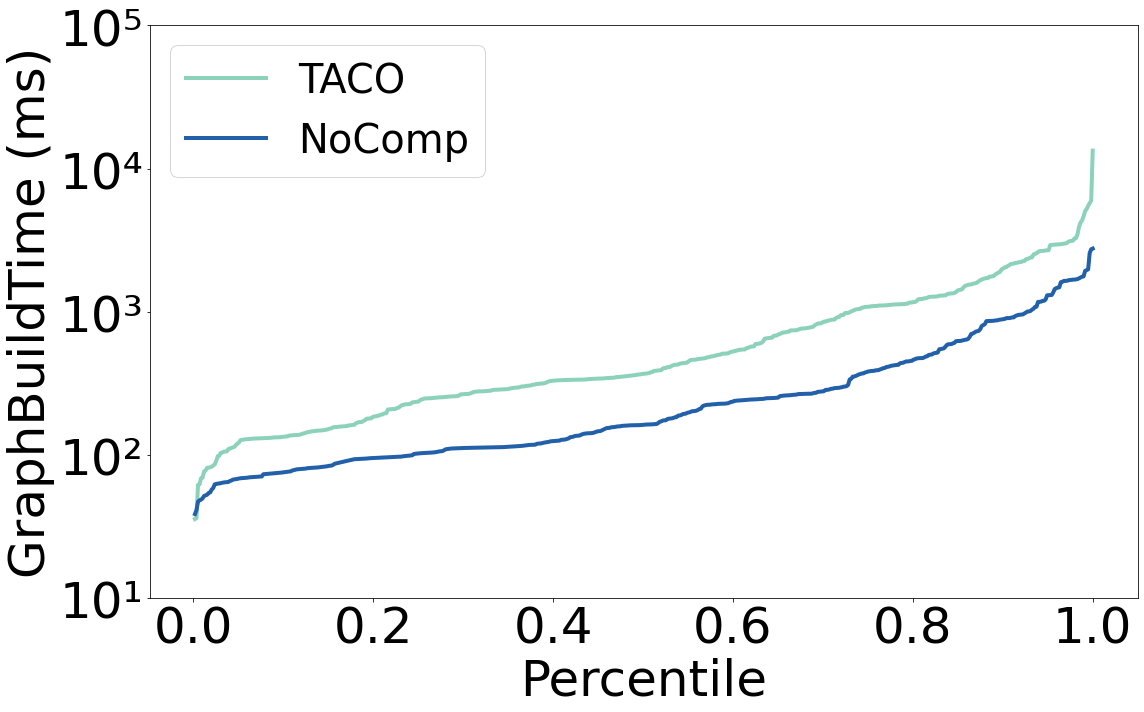

In [27]:
plot_percentile_transpose([freq_enron_taco, freq_enron_nocomp], 
                          ["TACO", "NoComp"],
                          xlabel="Percentile",
                          ylabel="GraphBuildTime (ms)",
                          y_tick_min=1,
                          y_tick_max=5,
                          y_tick_num=4,
                          save_path="./figures/enron_graph_build_compare.jpg"
                         )

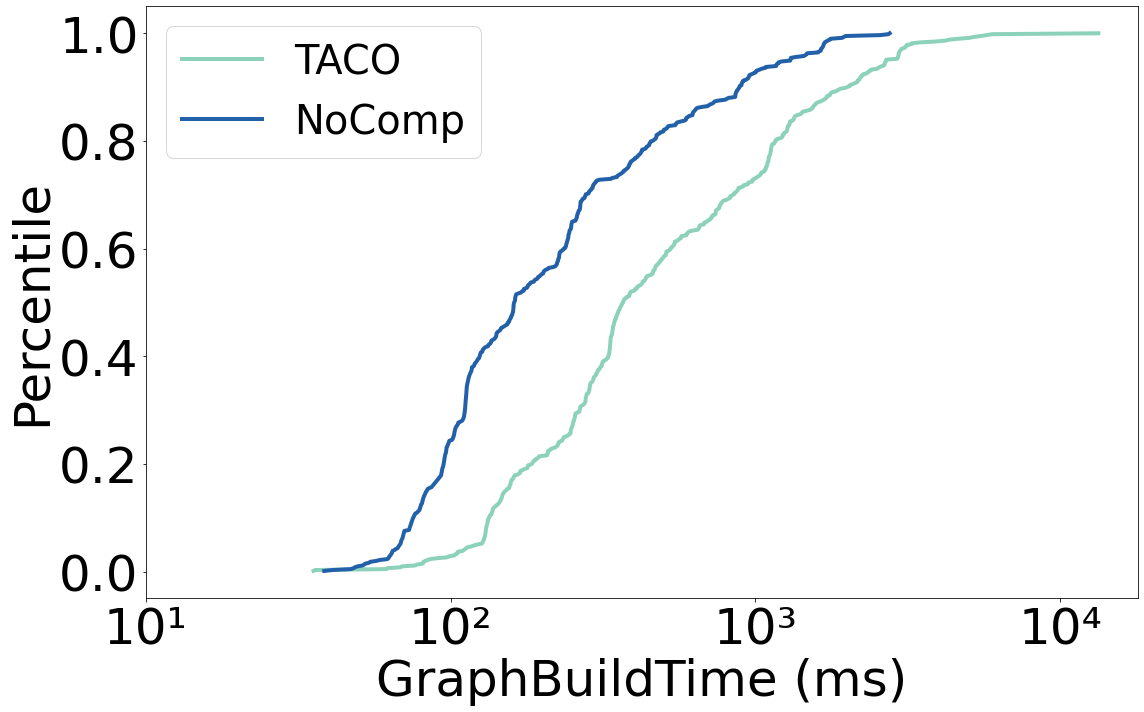

In [28]:
plot_percentile([freq_enron_taco, freq_enron_nocomp], 
                ["TACO", "NoComp"],
                xlabel="GraphBuildTime (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=4,
                x_tick_num=3
               )

In [29]:
df_github_taco = pd.merge(df_github_taco_max, df_github_taco_long, how="inner", on=["fileName"])
df_github_nocomp = pd.merge(df_github_nocomp_max, df_github_nocomp_long, how="inner", on=["fileName"])
df_github_taco['TACO_GraphBuildTime'] = (df_github_taco['GraphBuildTime_x'] + df_github_taco['GraphBuildTime_y']) / 2.
df_github_nocomp['NoComp_GraphBuildTime'] = (df_github_nocomp['GraphBuildTime_x'] + df_github_nocomp['GraphBuildTime_y']) / 2.

In [30]:
github_graph_result = pd.merge(df_github_taco, df_github_nocomp, how="inner", on=['fileName'])[['fileName', 'TACO_GraphBuildTime', 'NoComp_GraphBuildTime']]

In [31]:
github_graph_result['TACO_GraphBuildTime'].mean(), github_graph_result['NoComp_GraphBuildTime'].mean()

(1450.3174709562109, 826.5361930294906)

In [32]:
github_graph_result.sort_values(by="TACO_GraphBuildTime", ascending=False)

,fileName,TACO_GraphBuildTime,NoComp_GraphBuildTime
685,BBG_Security_Application_User_List_v5_46.xlsx,85978.5,41109.5
1643,Master-Calculations-Global-WASH-CBA_GLOBAL_PUB...,70217.5,25240.5
1847,DINAS PENDIDIKAN GABUNG BOS OK BANGET.xlsx,69836.0,24241.0
502,BBG_Security_Application_User_List_v5_34.xlsx,59080.5,27450.0
1431,monte.xlsx,52977.5,1656.0
...,...,...,...
1405,eCwEItsHZq6n07bp1B7JRR4nqHLhroEVLzef5SMlmRwQvw...,31.0,24.0
579,maoyanMovies.xlsx,30.5,35.5
2020,DLT.xlsx,26.0,23.0
719,925_listener_data.xlsx,22.0,29.5


In [33]:
freq_github_taco = get_pdf_df(github_graph_result, 'TACO_GraphBuildTime')
freq_github_nocomp = get_pdf_df(github_graph_result, 'NoComp_GraphBuildTime')

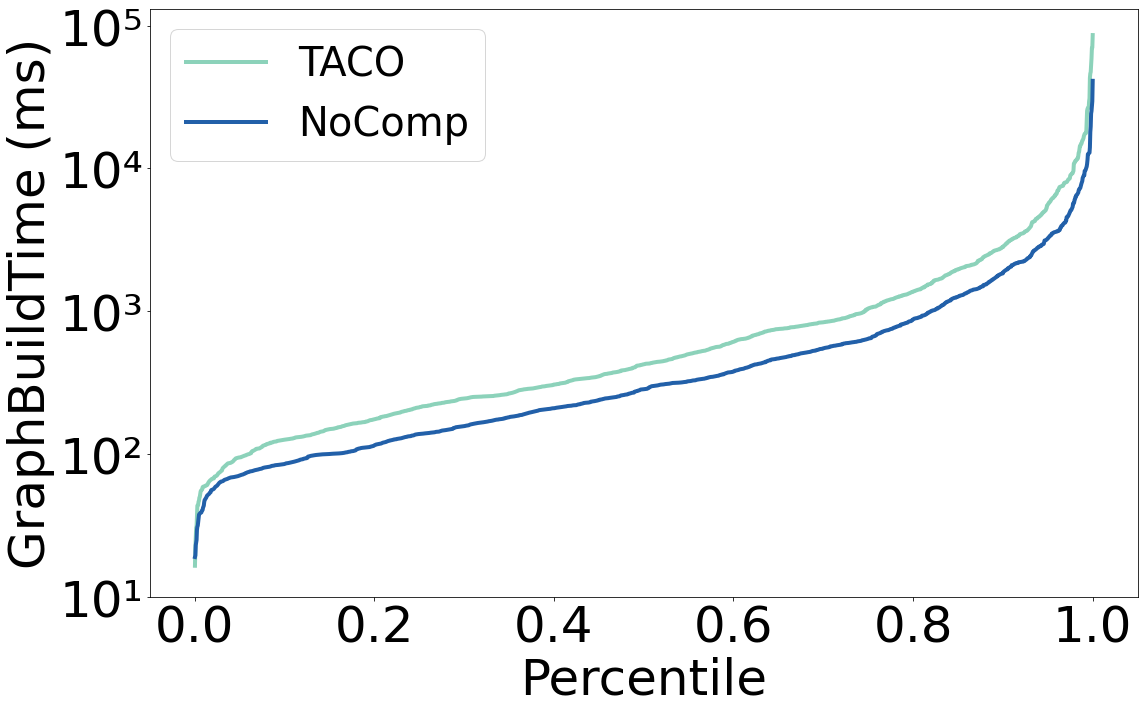

In [34]:
plot_percentile_transpose([freq_github_taco, freq_github_nocomp], 
                          ["TACO", "NoComp"],
                          xlabel="Percentile",
                          ylabel="GraphBuildTime (ms)",
                          y_tick_min=1,
                          y_tick_max=5,
                          y_tick_num=4,
                          save_path="./figures/github_graph_build_compare.jpg"
                         )

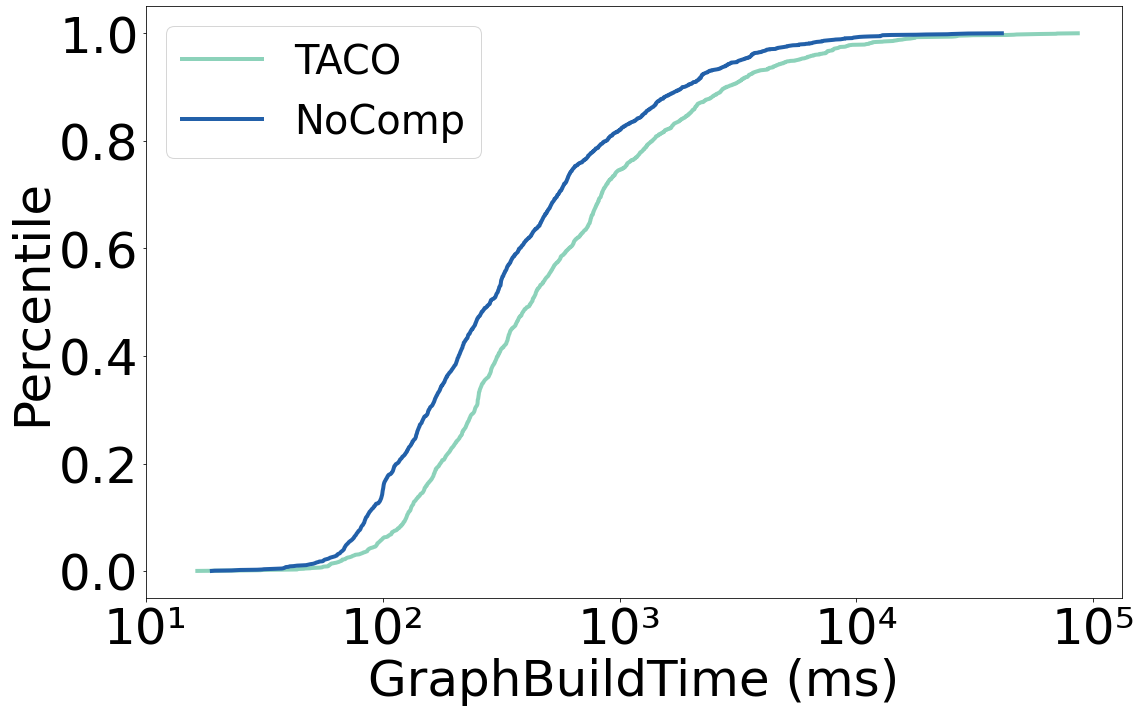

In [35]:
plot_percentile([freq_github_taco, freq_github_nocomp], 
                ["TACO", "NoComp"],
                xlabel="GraphBuildTime (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=5,
                x_tick_num=4
               )

# 3. Returning Control to Users

In [36]:
def rename_columns(df, is_long=False):
    rename_map = {
        "TACOLookupSize": "taco_size",
        "TACOLookupTime": "taco_time",
        "TACOPostProcessedLookupSize": "taco_post_size",
        "TACOPostProcessedLookupTime": "taco_post_time",
        "NoCompLookupSize": "nocomp_size",
        "NoCompLookupTime": "nocomp_time",
        "NoCompPostProcessedLookupSize": "nocomp_post_size",
        "NoCompPostProcessedLookupTime": "nocomp_post_time",
    }
    
    if is_long:
        for key in rename_map:
            rename_map[key] = "long_" + rename_map[key]
    else:
        for key in rename_map:
            rename_map[key] = "max_" + rename_map[key]
            
    df = df.rename(columns=rename_map)
    if "GraphBuildTime" in list(df.columns):
        df = df.drop(['GraphBuildTime'], axis=1)
    
    remain_cols = [x for x in list(df.columns) if "post" not in x]
    return df[remain_cols]

In [37]:
def read_and_average_files(dir_path, fileName, is_long=False):
    df = rename_columns(pd.read_csv(dir_path + "/" + fileName + "_1.csv"), is_long)
    df2 = rename_columns(pd.read_csv(dir_path + "/" + fileName + "_2.csv"), is_long)
    df3 = rename_columns(pd.read_csv(dir_path + "/" + fileName + "_3.csv"), is_long)
    column_list = list(df.columns)
    df_merged = pd.merge(df, df2, how="inner", on=[column_list[0], column_list[1]])
    df_merged = pd.merge(df_merged, df3, how="inner", on=[column_list[0], column_list[1]])
    list1, list2 = [], []
    for i in range(len(df_merged)):
        ls = [df_merged.loc[i, col_name] for col_name in list(df_merged.columns) if column_list[2] in col_name]
        ls2 = [df_merged.loc[i, col_name] for col_name in list(df_merged.columns) if column_list[3] in col_name]
        list1.append(np.mean(ls))
        list2.append(np.mean(ls2))
    df_merged[column_list[2]] = list1
    df_merged[column_list[3]] = list2
    return df_merged[column_list]

In [38]:
df_enron_taco_max = read_and_average_files(enron_lookup, "enron_max_taco_10k", False)
df_enron_taco_long = read_and_average_files(enron_lookup, "enron_long_taco_10k", True)
df_enron_nocomp_max = read_and_average_files(enron_lookup, "enron_max_nocomp_10k", False)
df_enron_nocomp_long = read_and_average_files(enron_lookup, "enron_long_nocomp_10k", True)
df_github_taco_max = read_and_average_files(github_lookup, "github_max_taco_10k", False)
df_github_taco_long = read_and_average_files(github_lookup, "github_long_taco_10k", True)
df_github_nocomp_max = read_and_average_files(github_lookup, "github_max_nocomp_10k", False)
df_github_nocomp_long = read_and_average_files(github_lookup, "github_long_nocomp_10k", True)

In [39]:
df_github_nocomp_long.head()

,fileName,Longest Dep Ref,long_nocomp_size,long_nocomp_time
0,1. Excel Homework.xlsx,Sheet1:J3248,1.0,24.000000
1,2019-05-23-0936_empty_racir.xlsx,Measurements:C11,5610.0,122.000000
2,NIRISS_SIAF.xlsx,DDC:C20,22.0,0.666667
3,工作簿1-20181122170204822.xlsx,不良明细:CEA5,2.0,0.000000
4,W22704-181.xlsx,Sheet1:D2,14196.0,196.333333


In [40]:
df_enron_max = pd.merge(df_enron_taco_max, df_enron_nocomp_max, how="inner", on=["fileName", "Max Dep Ref"])
df_enron_long = pd.merge(df_enron_taco_long, df_enron_nocomp_long, how="inner", on=["fileName", "Longest Dep Ref"])

In [41]:
df_enron_merged = pd.merge(df_enron_max, df_enron_long, how="inner", on=["fileName"])
# df_enron_merged.to_csv("./enron_result_merged.csv", index=False)

In [42]:
df_enron_merged.head()

,fileName,Max Dep Ref,max_taco_size,max_taco_time,max_nocomp_size,max_nocomp_time,Longest Dep Ref,long_taco_size,long_taco_time,long_nocomp_size,long_nocomp_time
0,stacey_white_000_1_1.pst.254.xls,AlphaSort:F6836,3.0,9.333333,3.0,26.666667,AlphaSort:F4400,3.0,9.000000,3.0,25.333333
1,darron_c_giron_002_1_1_1.pst.177.xls,Darron:E5,205.0,8.333333,2978.0,83.666667,Darron:J4,205.0,8.000000,2978.0,79.000000
2,stacey_white_000_1_1.pst.262.xls,BRA Power:A6,28.0,1.000000,4385.0,131.666667,BRA Power:A6,28.0,0.333333,4385.0,120.333333
3,mike_grigsby_000_1_1_1.pst.248.xls,Months:F4,4.0,0.000000,306.0,1.666667,Months:F4,4.0,0.000000,306.0,1.333333
4,kevin_ruscitti_000_1_1.pst.156.xls,03-21-00AM:BT499,0.0,0.000000,0.0,0.000000,03-21-00AM:X531,1.0,0.000000,1.0,0.333333


In [43]:
df_github_max = pd.merge(df_github_taco_max, df_github_nocomp_max, how="inner", on=["fileName", "Max Dep Ref"])
df_github_long = pd.merge(df_github_taco_long, df_github_nocomp_long, how="inner", on=["fileName", "Longest Dep Ref"])

In [44]:
df_github_merged = pd.merge(df_github_max, df_github_long, how="inner", on=["fileName"])
# df_github_merged.to_csv("./github_result_merged.csv", index=False)

In [45]:
df_github_merged.head()

,fileName,Max Dep Ref,max_taco_size,max_taco_time,max_nocomp_size,max_nocomp_time,Longest Dep Ref,long_taco_size,long_taco_time,long_nocomp_size,long_nocomp_time
0,1. Excel Homework.xlsx,Sheet1:E4030,2.0,9.666667,2.0,24.000000,Sheet1:J3248,1.0,8.666667,1.0,24.000000
1,2019-05-23-0936_empty_racir.xlsx,Measurements:E13,20.0,2.000000,6600.0,122.000000,Measurements:C11,17.0,1.333333,5610.0,122.000000
2,NIRISS_SIAF.xlsx,Calc:AE3,23.0,1.000000,690.0,10.000000,DDC:C20,6.0,0.666667,22.0,0.666667
3,工作簿1-20181122170204822.xlsx,不良明细:CBJ5,1.0,0.333333,2.0,0.000000,不良明细:CEA5,1.0,0.333333,2.0,0.000000
4,W22704-181.xlsx,Sheet1:E2,4.0,0.333333,14196.0,124.333333,Sheet1:D2,4.0,0.666667,14196.0,196.333333


### CDF Plot

In [46]:
freq_enron_max_taco_size = get_pdf_df(df_enron_merged, 'max_taco_size', True)
freq_enron_max_nocomp_size = get_pdf_df(df_enron_merged, 'max_nocomp_size', True)
freq_enron_max_taco_time = get_pdf_df(df_enron_merged, 'max_taco_time', True)
freq_enron_max_nocomp_time = get_pdf_df(df_enron_merged, 'max_nocomp_time', True)
freq_enron_long_taco_size = get_pdf_df(df_enron_merged, 'long_taco_size', True)
freq_enron_long_nocomp_size = get_pdf_df(df_enron_merged, 'long_nocomp_size', True)
freq_enron_long_taco_time = get_pdf_df(df_enron_merged, 'long_taco_time', True)
freq_enron_long_nocomp_time = get_pdf_df(df_enron_merged, 'long_nocomp_time', True)

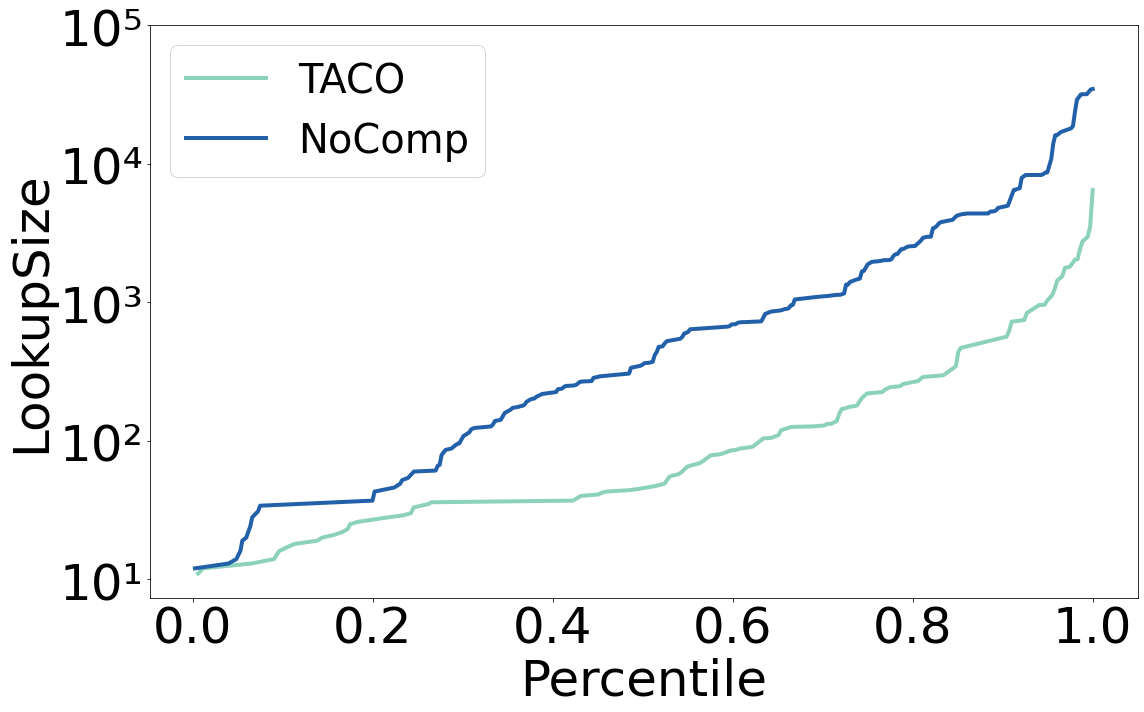

In [47]:
plot_percentile_transpose([freq_enron_max_taco_size, freq_enron_max_nocomp_size], 
                          ["TACO", "NoComp"],
                          ylabel="LookupSize",
                          xlabel="Percentile",
                          y_tick_min=1,
                          y_tick_max=5,
                          y_tick_num=4,
                          save_path="./figures/enron_lookup_size_max_compare.jpg"
                         )

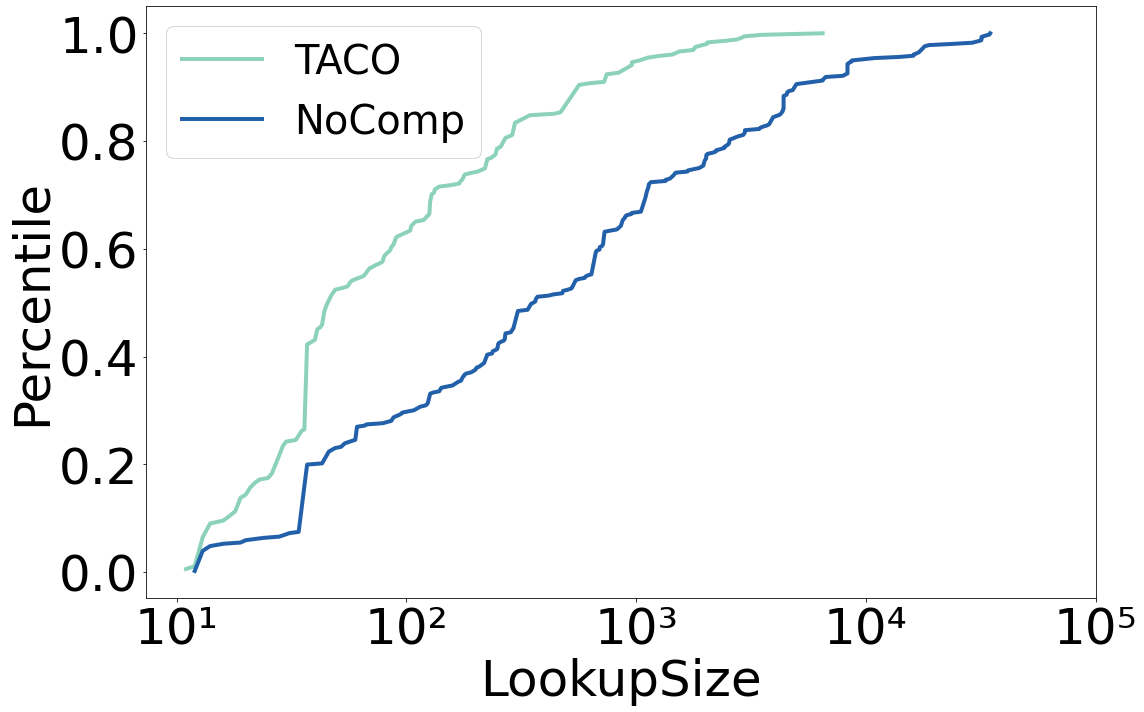

In [48]:
plot_percentile([freq_enron_max_taco_size, freq_enron_max_nocomp_size], 
                ["TACO", "NoComp"],
                xlabel="LookupSize",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=5,
                x_tick_num=4
               )

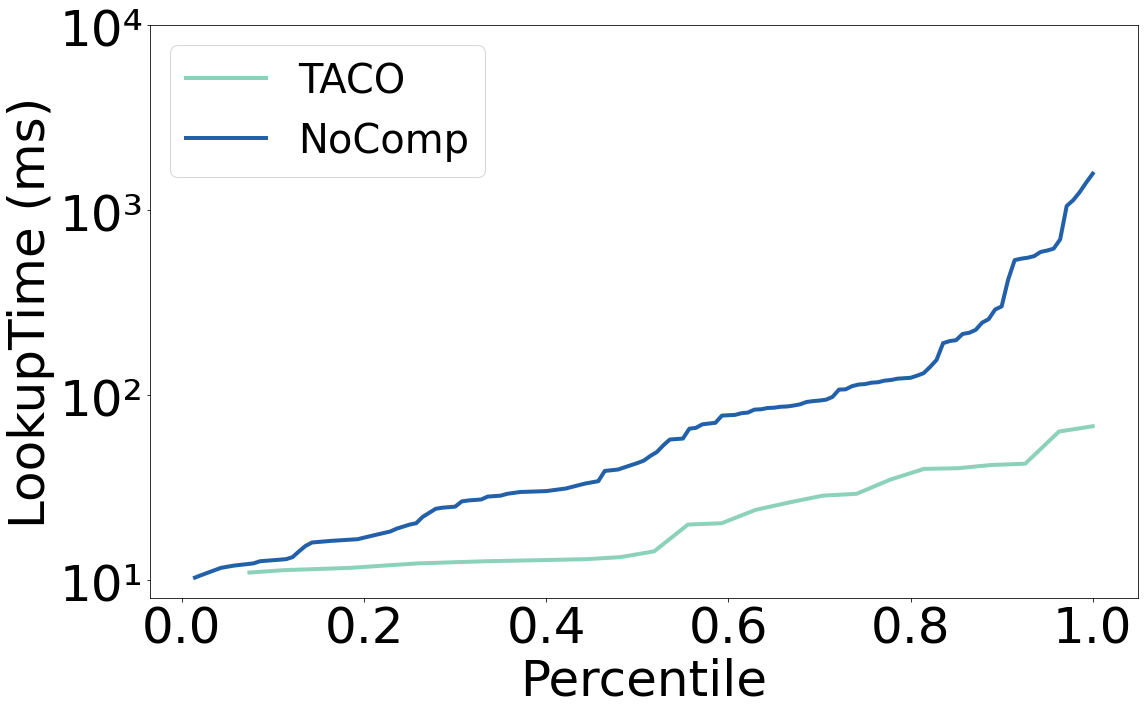

In [49]:
plot_percentile_transpose([freq_enron_max_taco_time, freq_enron_max_nocomp_time], 
                          ["TACO", "NoComp"],
                          ylabel="LookupTime (ms)",
                          xlabel="Percentile",
                          y_tick_min=1,
                          y_tick_max=4,
                          y_tick_num=3,
                          save_path="./figures/enron_lookup_time_max_compare.jpg"
                         )

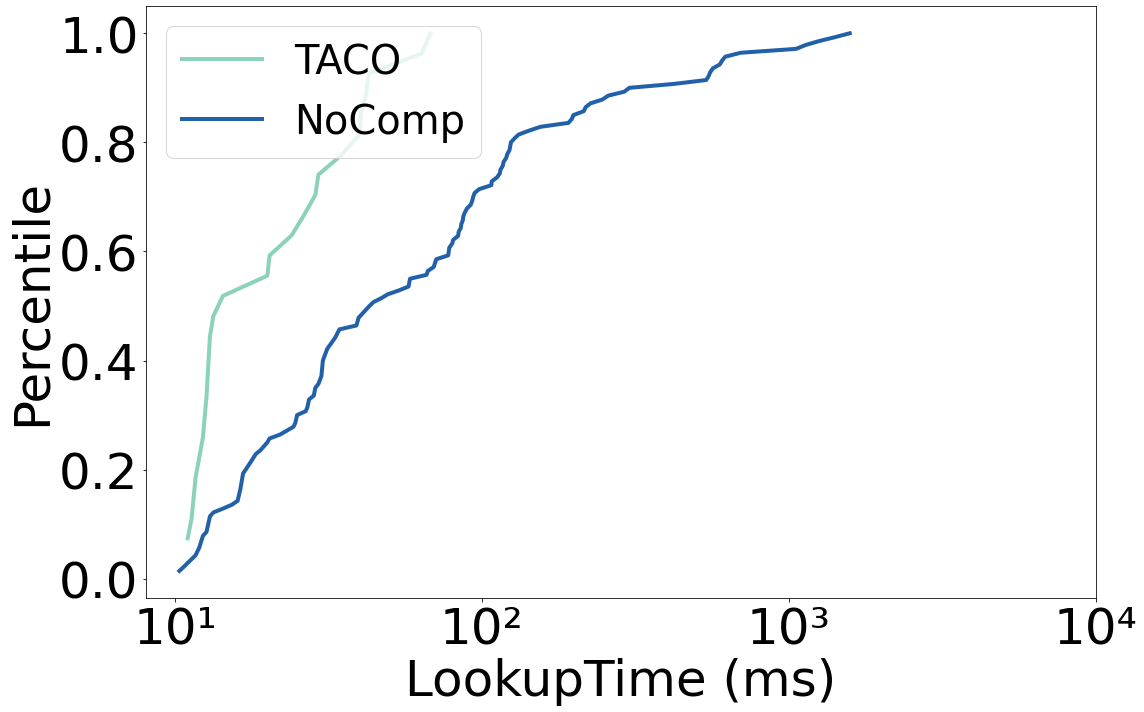

In [50]:
plot_percentile([freq_enron_max_taco_time, freq_enron_max_nocomp_time], 
                ["TACO", "NoComp"],
                xlabel="LookupTime (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=4,
                x_tick_num=3
               )

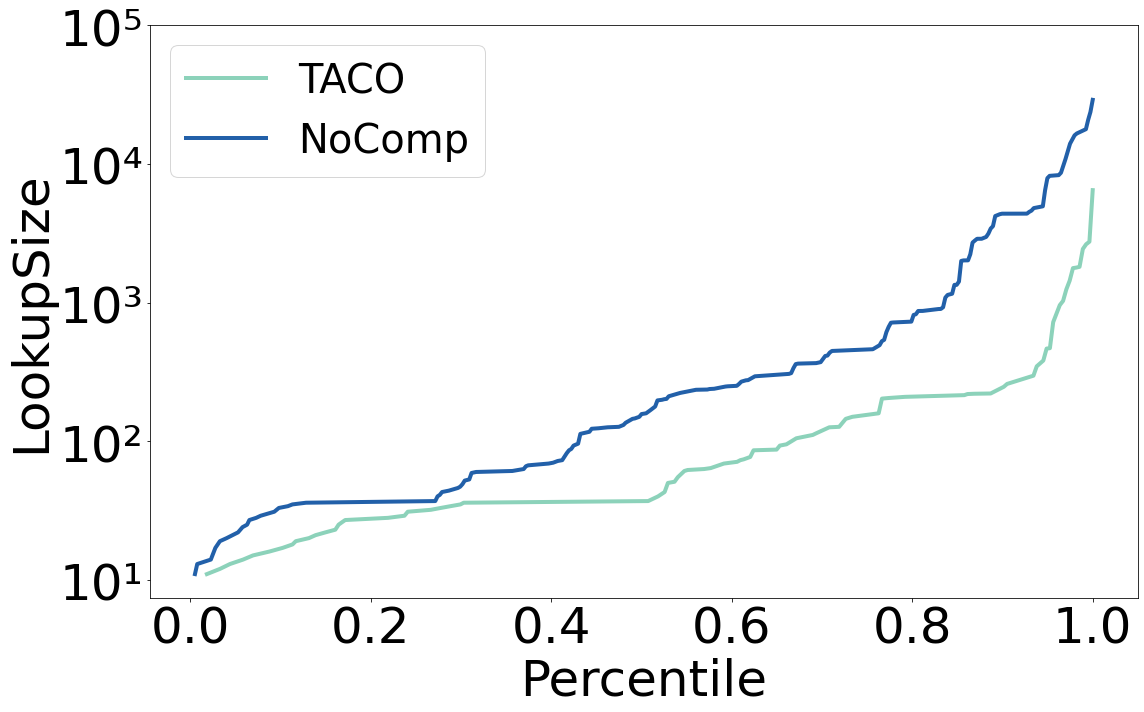

In [51]:
plot_percentile_transpose([freq_enron_long_taco_size, freq_enron_long_nocomp_size], 
                ["TACO", "NoComp"],
                ylabel="LookupSize",
                xlabel="Percentile",
                y_tick_min=1,
                y_tick_max=5,
                y_tick_num=4,
                          save_path="./figures/enron_lookup_size_long_compare.jpg"
               )

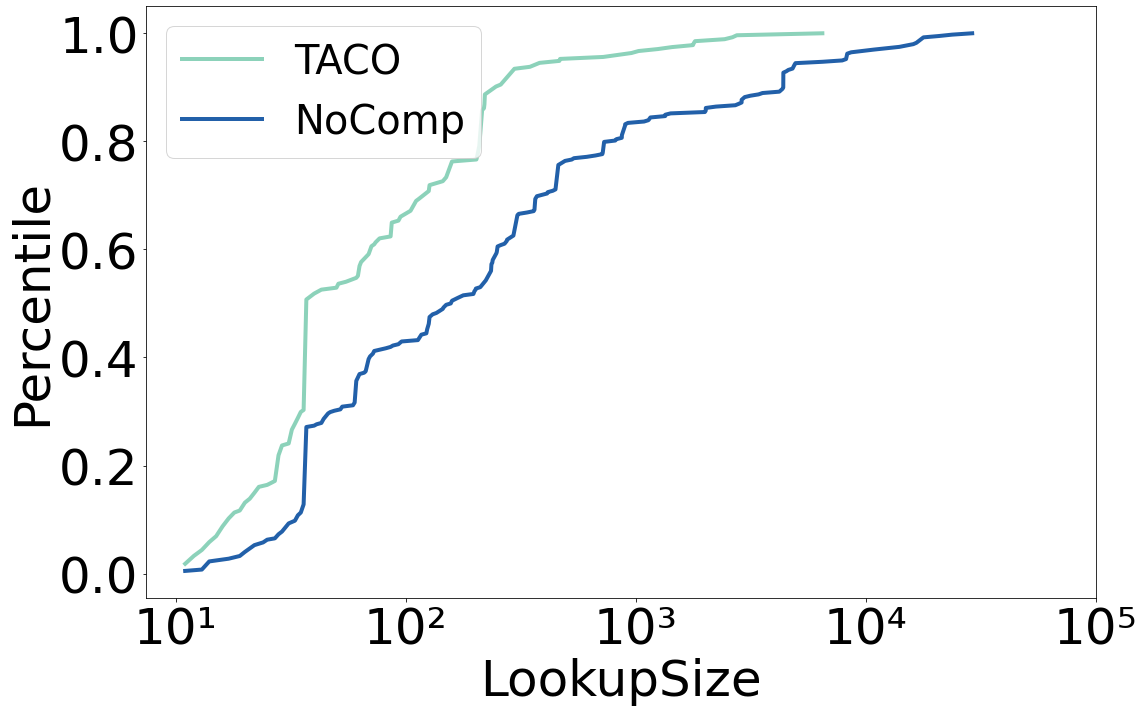

In [52]:
plot_percentile([freq_enron_long_taco_size, freq_enron_long_nocomp_size], 
                ["TACO", "NoComp"],
                xlabel="LookupSize",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=5,
                x_tick_num=4,
               )

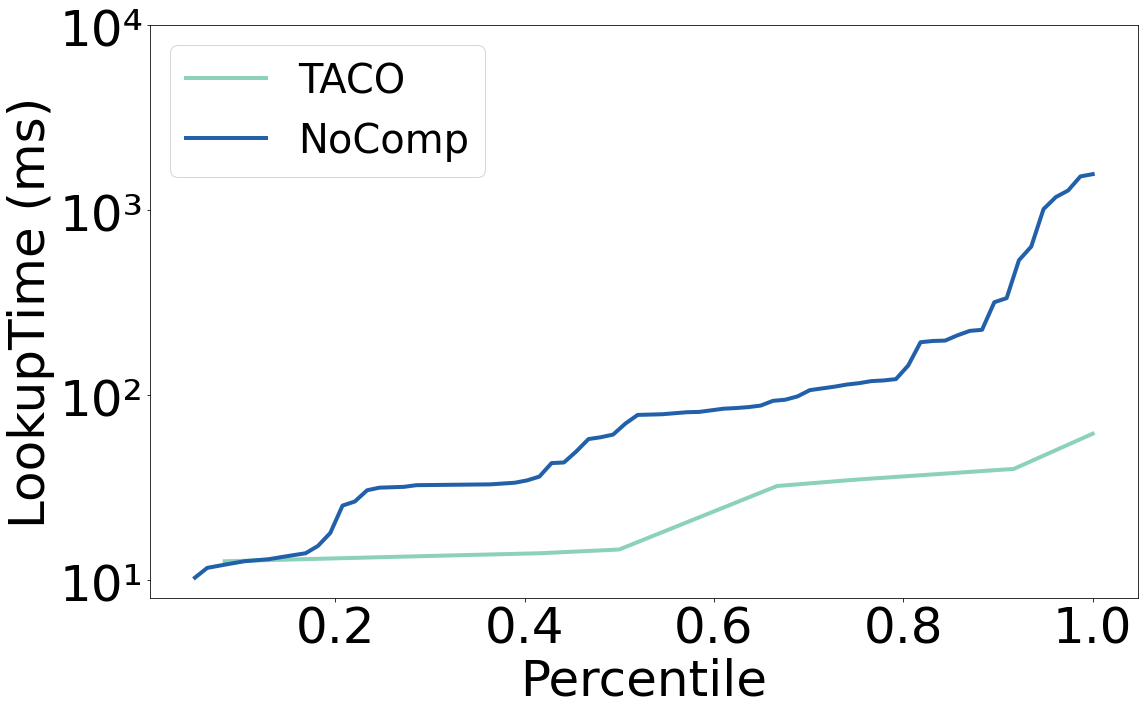

In [53]:
plot_percentile_transpose([freq_enron_long_taco_time, freq_enron_long_nocomp_time], 
                ["TACO", "NoComp"],
                ylabel="LookupTime (ms)",
                xlabel="Percentile",
                y_tick_min=1,
                y_tick_max=4,
                y_tick_num=3,
                          save_path="./figures/enron_lookup_time_long_compare.jpg"
               )

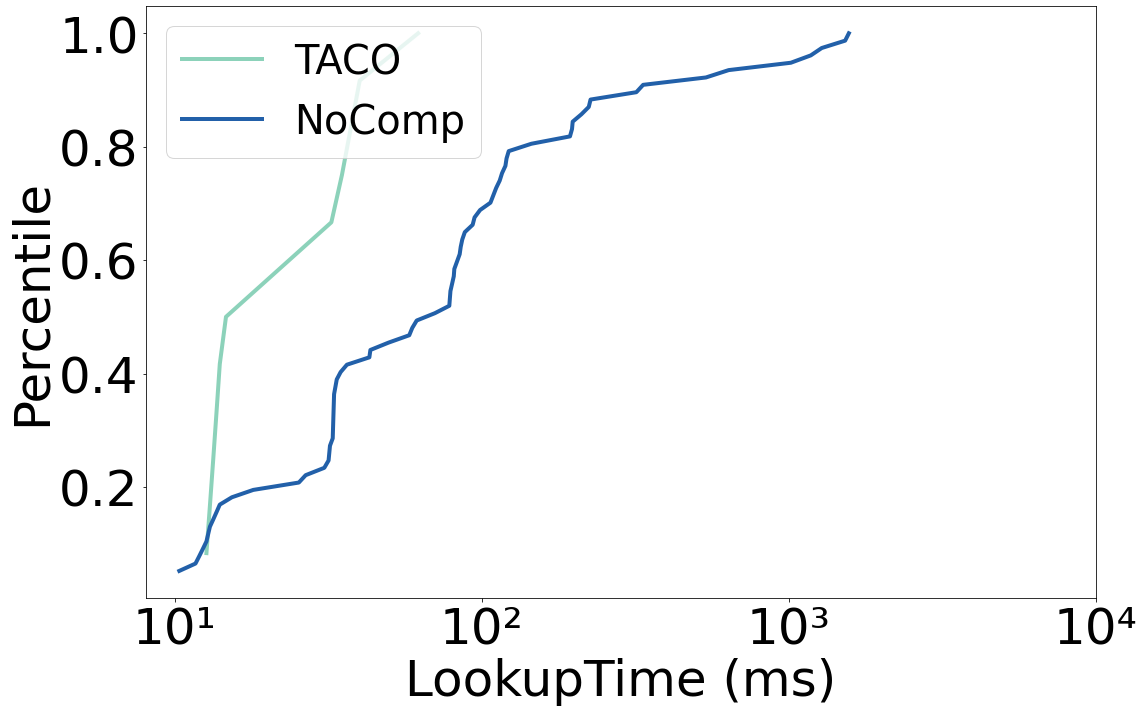

In [54]:
plot_percentile([freq_enron_long_taco_time, freq_enron_long_nocomp_time], 
                ["TACO", "NoComp"],
                xlabel="LookupTime (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=4,
                x_tick_num=3
               )

In [55]:
freq_github_max_taco_size = get_pdf_df(df_github_merged, 'max_taco_size', True)
freq_github_max_nocomp_size = get_pdf_df(df_github_merged, 'max_nocomp_size', True)
freq_github_max_taco_time = get_pdf_df(df_github_merged, 'max_taco_time', True)
freq_github_max_nocomp_time = get_pdf_df(df_github_merged, 'max_nocomp_time', True)
freq_github_long_taco_size = get_pdf_df(df_github_merged, 'long_taco_size', True)
freq_github_long_nocomp_size = get_pdf_df(df_github_merged, 'long_nocomp_size', True)
freq_github_long_taco_time = get_pdf_df(df_github_merged, 'long_taco_time', True)
freq_github_long_nocomp_time = get_pdf_df(df_github_merged, 'long_nocomp_time', True)

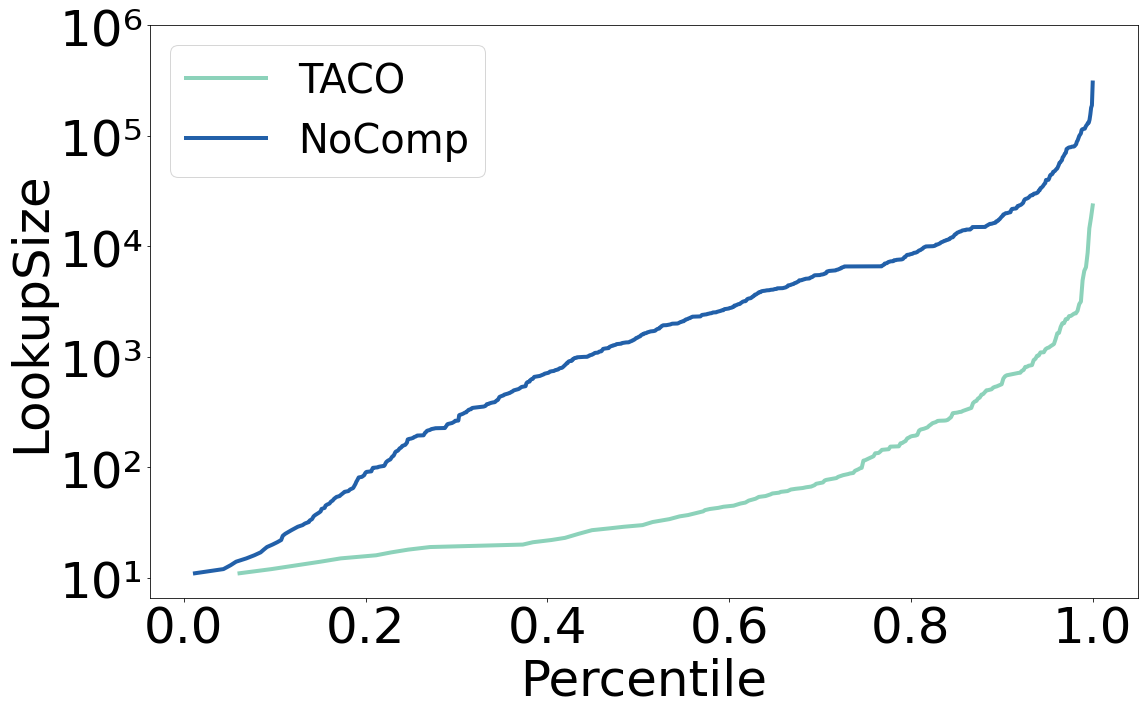

In [56]:
plot_percentile_transpose([freq_github_max_taco_size, freq_github_max_nocomp_size], 
                ["TACO", "NoComp"],
                ylabel="LookupSize",
                xlabel="Percentile",
                y_tick_min=1,
                y_tick_max=6,
                y_tick_num=5,
                          save_path="./figures/github_lookup_size_max_compare.jpg"
               )

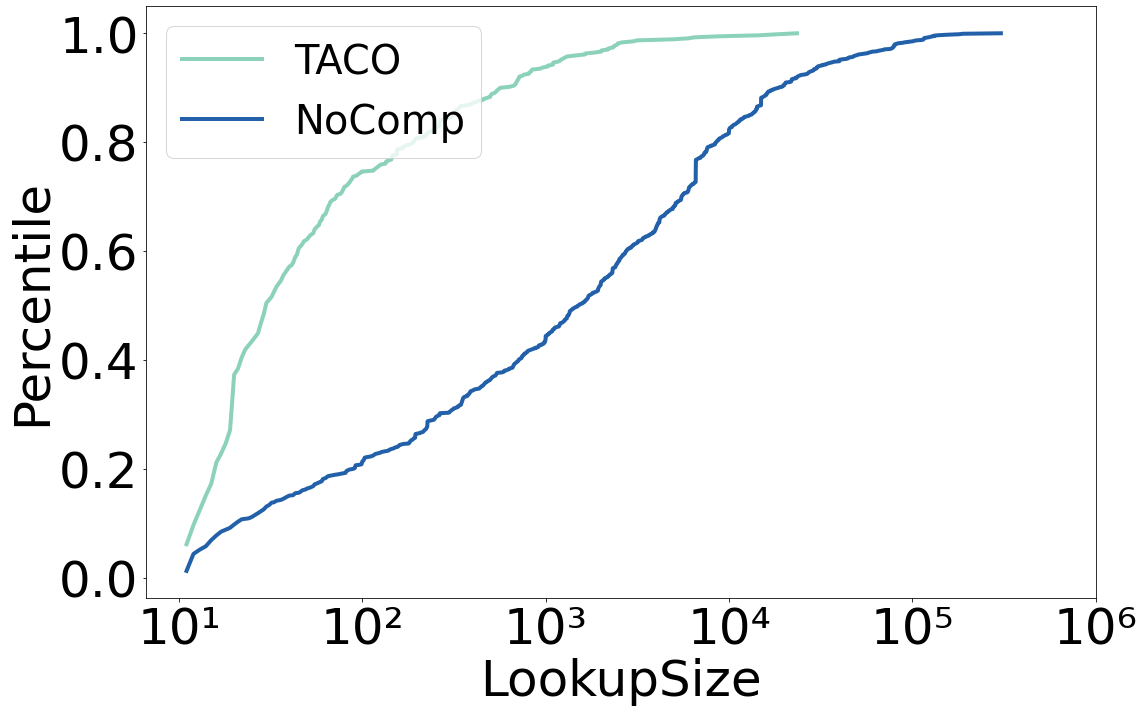

In [57]:
plot_percentile([freq_github_max_taco_size, freq_github_max_nocomp_size], 
                ["TACO", "NoComp"],
                xlabel="LookupSize",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=6,
                x_tick_num=5,
               )

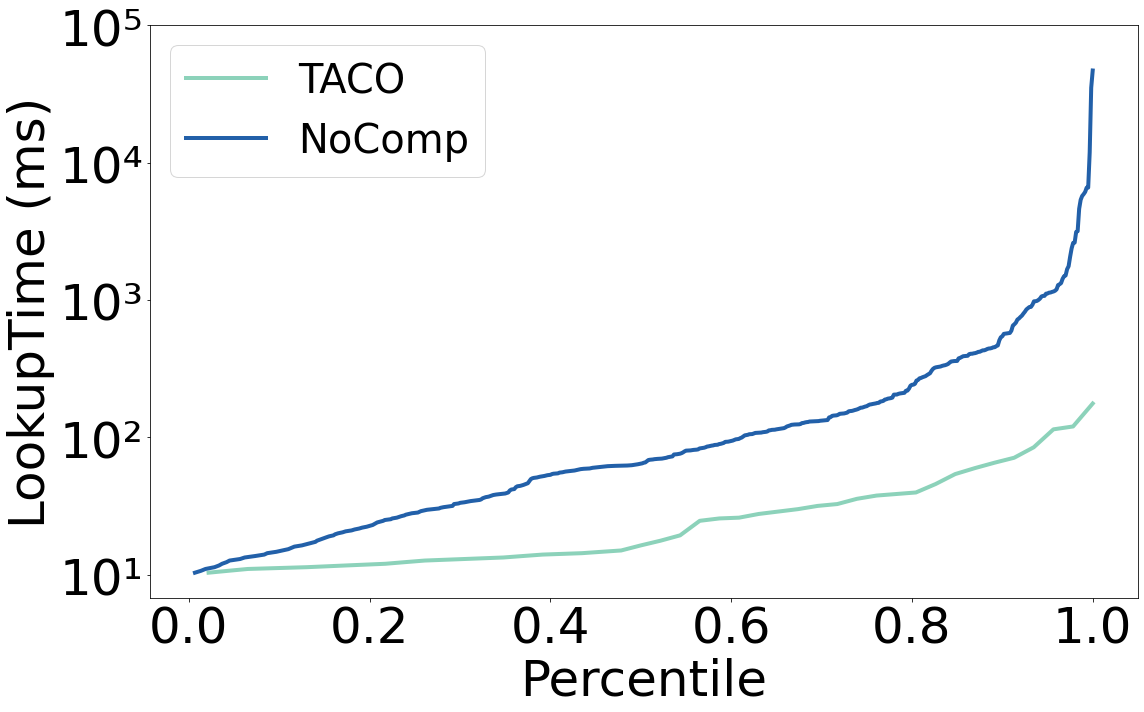

In [58]:
plot_percentile_transpose([freq_github_max_taco_time, freq_github_max_nocomp_time], 
                ["TACO", "NoComp"],
                ylabel="LookupTime (ms)",
                xlabel="Percentile",
                y_tick_min=1,
                y_tick_max=5,
                y_tick_num=4,
                          save_path="./figures/github_lookup_time_max_compare.jpg"
               )

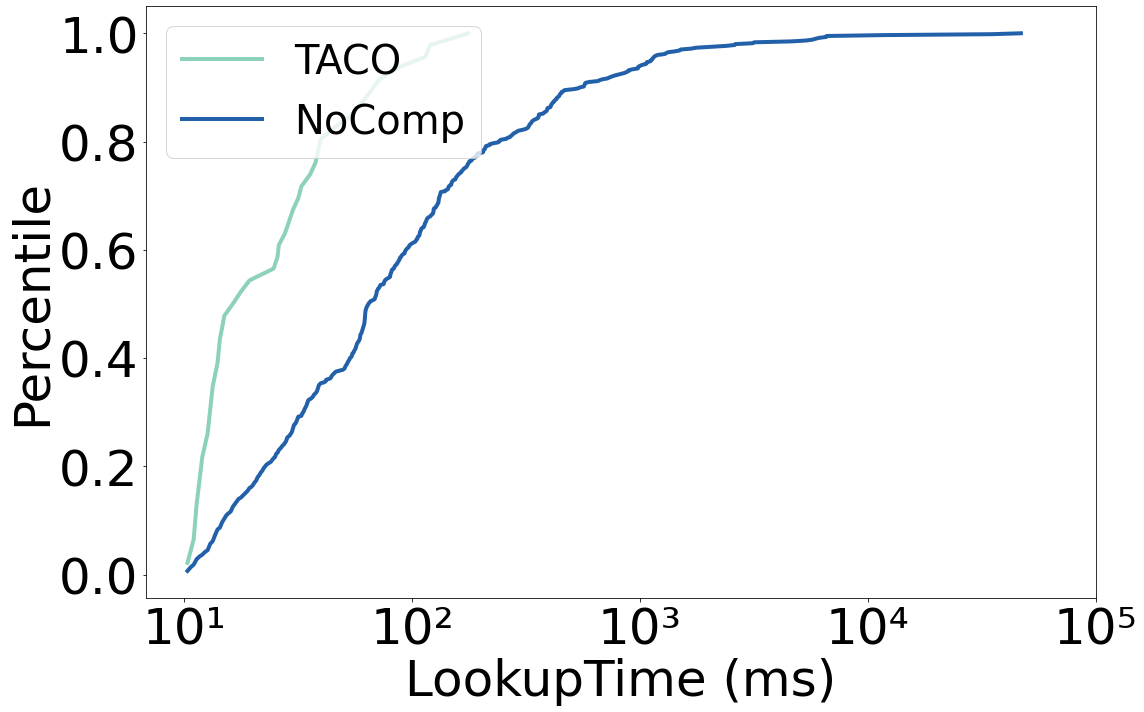

In [59]:
plot_percentile([freq_github_max_taco_time, freq_github_max_nocomp_time], 
                ["TACO", "NoComp"],
                xlabel="LookupTime (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=5,
                x_tick_num=4
               )

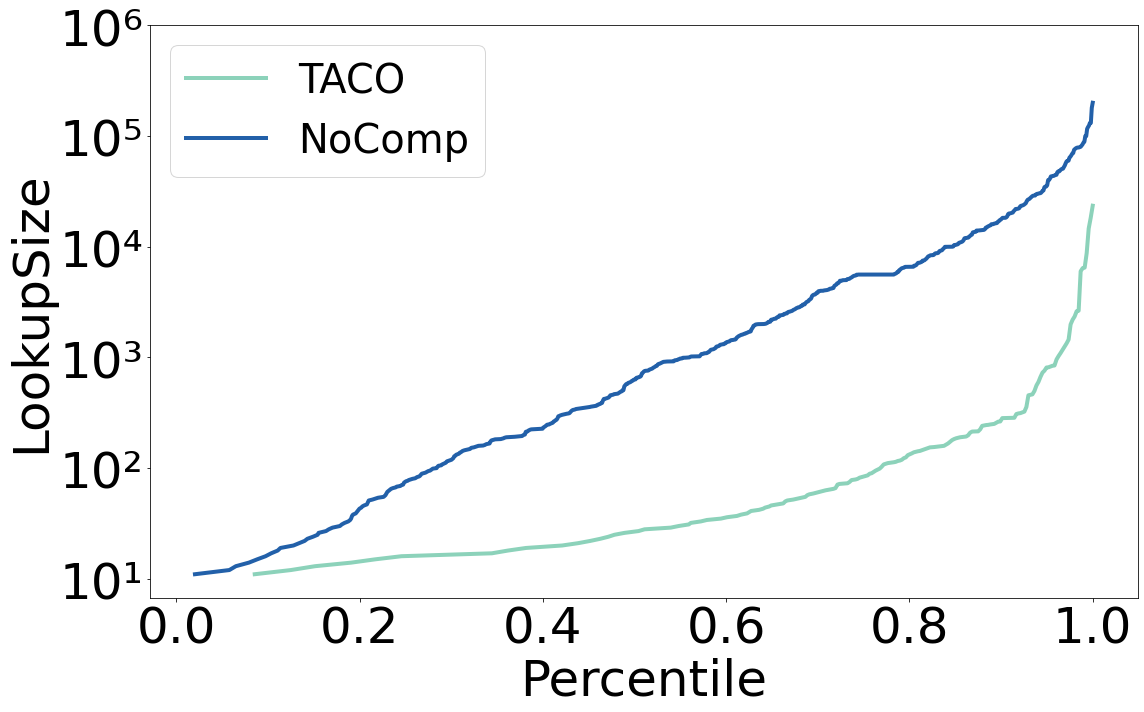

In [60]:
plot_percentile_transpose([freq_github_long_taco_size, freq_github_long_nocomp_size], 
                ["TACO", "NoComp"],
                ylabel="LookupSize",
                xlabel="Percentile",
                y_tick_min=1,
                y_tick_max=6,
                y_tick_num=5,
                          save_path="./figures/github_lookup_size_long_compare.jpg"
               )

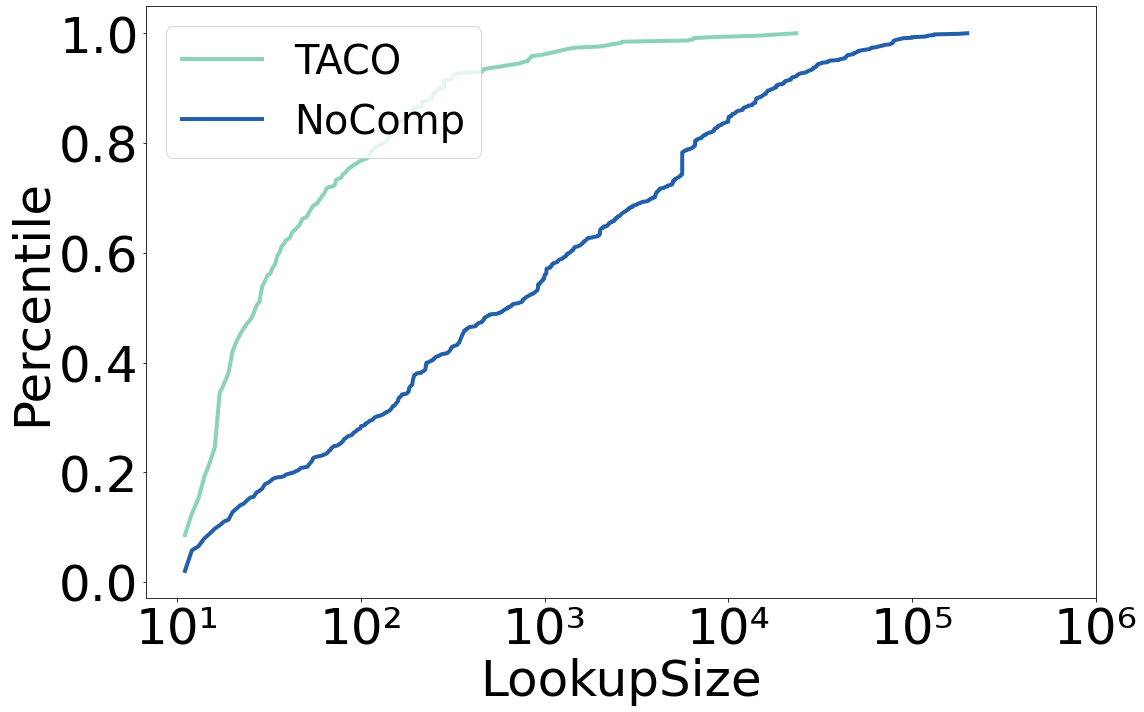

In [61]:
plot_percentile([freq_github_long_taco_size, freq_github_long_nocomp_size], 
                ["TACO", "NoComp"],
                xlabel="LookupSize",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=6,
                x_tick_num=5
               )

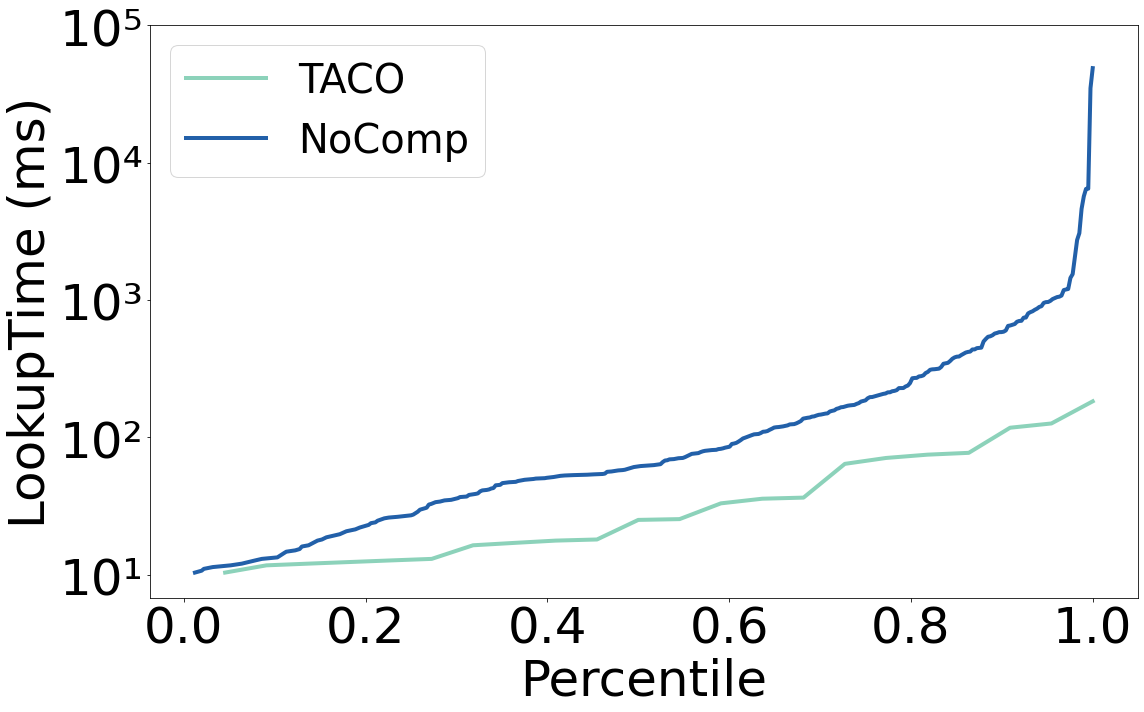

In [62]:
plot_percentile_transpose([freq_github_long_taco_time, freq_github_long_nocomp_time], 
                ["TACO", "NoComp"],
                ylabel="LookupTime (ms)",
                xlabel="Percentile",
                y_tick_min=1,
                y_tick_max=5,
                y_tick_num=4,
                          save_path="./figures/github_lookup_time_long_compare.jpg"
               )

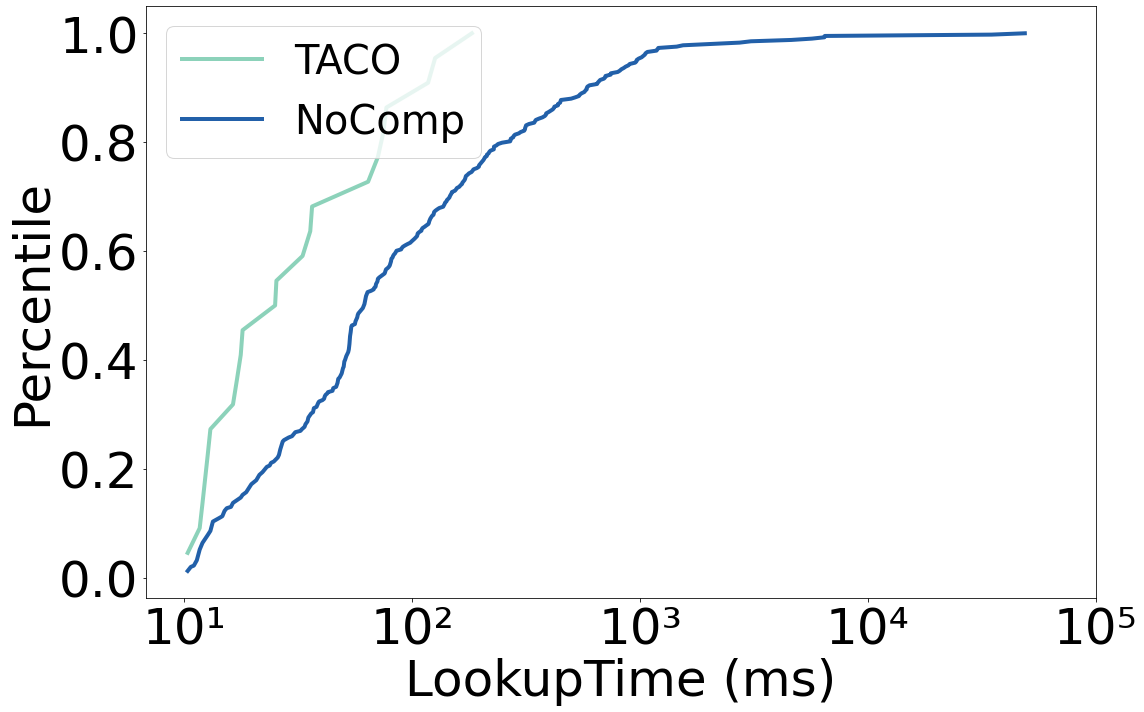

In [63]:
plot_percentile([freq_github_long_taco_time, freq_github_long_nocomp_time], 
                ["TACO", "NoComp"],
                xlabel="LookupTime (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=5,
                x_tick_num=4
               )

### Analyze Enron results

In [64]:
df_enron_merged

,fileName,Max Dep Ref,max_taco_size,max_taco_time,max_nocomp_size,max_nocomp_time,Longest Dep Ref,long_taco_size,long_taco_time,long_nocomp_size,long_nocomp_time
0,stacey_white_000_1_1.pst.254.xls,AlphaSort:F6836,3.0,9.333333,3.0,26.666667,AlphaSort:F4400,3.0,9.000000,3.0,25.333333
1,darron_c_giron_002_1_1_1.pst.177.xls,Darron:E5,205.0,8.333333,2978.0,83.666667,Darron:J4,205.0,8.000000,2978.0,79.000000
2,stacey_white_000_1_1.pst.262.xls,BRA Power:A6,28.0,1.000000,4385.0,131.666667,BRA Power:A6,28.0,0.333333,4385.0,120.333333
3,mike_grigsby_000_1_1_1.pst.248.xls,Months:F4,4.0,0.000000,306.0,1.666667,Months:F4,4.0,0.000000,306.0,1.333333
4,kevin_ruscitti_000_1_1.pst.156.xls,03-21-00AM:BT499,0.0,0.000000,0.0,0.000000,03-21-00AM:X531,1.0,0.000000,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
587,don_baughman_000_1_1.pst.127.xls,Sheet1:C47,37.0,0.333333,37.0,0.666667,Sheet1:C38,37.0,0.000000,37.0,0.333333
588,kevin_ruscitti_000_1_1.pst.4.xls,Swap:A8,29.0,0.333333,1159.0,10.666667,Swap:A8,29.0,0.666667,1159.0,10.333333
589,jane_tholt_000_1_1.pst.198.xls,Summary:B185,57.0,1.000000,1485.0,32.666667,Study 4a:A9,9.0,0.000000,82.0,0.333333
590,andy_zipper_000_1_1.pst.67.xls,DD-ENA:F500,4.0,0.000000,8.0,0.333333,DD-EGL:P29,3.0,0.000000,3.0,0.000000


In [65]:
df_larger_than = df_enron_merged[(df_enron_merged["max_taco_time"] > df_enron_merged["max_nocomp_time"]) & (df_enron_merged["max_nocomp_time"] > 10)]
df_larger_than[["fileName", "max_taco_time", "max_nocomp_time"]]

,fileName,max_taco_time,max_nocomp_time
19,kevin_ruscitti_000_1_1.pst.125.xls,63.666667,53.666667
46,tracy_geaccone_000_1_1.pst.268.xls,14.333333,12.333333
66,tracy_geaccone_000_1_1.pst.146.xls,12.666667,12.000000
213,paul_y'barbo_000_1_1.pst.26.xls,13.000000,12.333333
578,tracy_geaccone_000_1_1.pst.237.xls,12.333333,11.666667


In [66]:
threshold=500
df_enron_merged[df_enron_merged["max_nocomp_time"] > threshold][["fileName", "max_nocomp_time"]]

,fileName,max_nocomp_time
87,dutch_quigley_000_1_1.pst.51.xls,1413.333333
127,mike_grigsby_000_1_1_1.pst.106.xls,548.000000
144,matthew_lenhart_000_1_1.pst.23.xls,621.000000
197,matthew_lenhart_000_1_1.pst.20.xls,538.000000
267,harry_arora_000_1_1.pst.130.xls,1056.333333
301,mike_grigsby_000_1_1_1.pst.108.xls,697.000000
375,jim_schwieger_000_1_1.pst.100.xls,1135.000000
407,phillip_allen_000_1_1.pst.102.xls,554.333333
522,phillip_allen_000_1_1.pst.253.xls,596.000000
561,matthew_lenhart_000_1_1.pst.19.xls,606.333333


In [67]:
df_enron_merged[df_enron_merged["long_nocomp_time"] > threshold][["fileName", "long_nocomp_time"]]

,fileName,long_nocomp_time
87,dutch_quigley_000_1_1.pst.51.xls,1280.333333
267,harry_arora_000_1_1.pst.130.xls,1015.666667
375,jim_schwieger_000_1_1.pst.100.xls,1179.666667
526,john_griffith_000_1_1.pst.185.xls,637.000000
563,jim_schwieger_000_1_1.pst.71.xls,1569.000000
576,kevin_presto_000_1_1.pst.16.xls,537.000000
585,jim_schwieger_000_1_1.pst.106.xls,1526.000000


In [68]:
df_enron_merged[df_enron_merged["max_taco_time"] > threshold][["fileName", "max_taco_time"]]

,fileName,max_taco_time


In [69]:
df_enron_merged[df_enron_merged["long_taco_time"] > threshold][["fileName", "long_taco_time"]]

,fileName,long_taco_time


### Analyze github dataset

In [70]:
df_larger_than = df_github_merged[(df_github_merged["max_taco_time"] > df_github_merged["max_nocomp_time"]) & (df_github_merged["max_nocomp_time"] > 10)]
df_larger_than[["fileName", "max_taco_time", "max_nocomp_time"]]

,fileName,max_taco_time,max_nocomp_time
21,kevin_ruscitti__20327__NGPL_StorageE_Test.xlsx,65.333333,49.666667
130,el staff coll.xlsx,16.333333,11.333333
687,H2_consumption_test_15min.xlsx,84.666667,51.666667
886,Real-Statistics-Examples-Regression-2.xlsx,35.666667,34.000000
1505,COVID-19 w Polsce.xlsx,30.000000,25.666667


In [71]:
threshold=500
df_github_merged[df_github_merged["max_nocomp_time"] > threshold][["fileName", "max_nocomp_time"]]

,fileName,max_nocomp_time
152,gaslines_model_public.xlsx,46936.333333
183,Tio Cash Master 1600 1 seventh 0a in the neigh...,1762.666667
206,Excel模拟神经网络进行4000次迭代.xlsx,924.000000
285,WM3796_LT_timeseries_normalization.xlsx,1168.333333
337,Fact2Sheet_Corona_20200605.xlsx,535.666667
...,...,...
2142,Detroit data (stata & Eviews outputs).xlsx,1072.000000
2176,螺纹_LLT模型-带止损-实盘记录优化版.xlsx,2376.333333
2183,经济总表.xlsx,2605.000000
2199,최경묵_퍼셉트론엑셀.xlsx,854.333333


In [72]:
df_github_merged[df_github_merged["long_nocomp_time"] > threshold][["fileName", "long_nocomp_time"]]

,fileName,long_nocomp_time
152,gaslines_model_public.xlsx,48839.666667
176,CPIvs行业.xlsx,6447.333333
206,Excel模拟神经网络进行4000次迭代.xlsx,964.333333
496,BurnTest180716.1.xlsx,705.000000
526,Kimblesworth CD Weir Logger.xlsx,539.333333
584,Tio Cash Master 0700 PS One Million Test Prime...,798.000000
664,aim120_amraap.xlsx,543.666667
665,InputData.xlsx,1202.000000
670,20180913_Data_Import_Tool_Logic..xlsx,553.333333
708,CovidVaccinationProjection3-3-2021.xlsx,4607.333333


In [73]:
df_github_merged[df_github_merged["max_taco_time"] > threshold][["fileName", "max_taco_time"]]

,fileName,max_taco_time


In [74]:
df_github_merged[df_github_merged["long_taco_time"] > threshold][["fileName", "long_taco_time"]]

,fileName,long_taco_time


# 4. Modify Formula Graph

In [75]:
def load_modify_results(path, filename):
    filename_list = [filename + "_" + str(i) + ".csv" for i in [1, 2, 3]]
    column_list = ['fileName', 'Max Dep Ref', 'GraphModifyTime']
    df1 = pd.read_csv(path + "/" + filename_list[0])
    df2 = pd.read_csv(path + "/" + filename_list[1])
    df3 = pd.read_csv(path + "/" + filename_list[2])
    df = pd.merge(df1, df2, on=column_list[:2], how="inner")
    df = pd.merge(df, df3, on=column_list[:2], how="inner")
    
    time_ls = []
    cand_col = [x for x in list(df.columns) if "GraphModifyTime" in x]
    for i in range(len(df)):
        ls = []
        for col in cand_col:
            ls.append(df.loc[i, col])
        time_ls.append(np.mean(ls))
    df['GraphModifyTime'] = time_ls
    return df[column_list]

In [76]:
enron_nocomp_modify = load_modify_results(enron_modify, "enron_nocomp_modify")
enron_taco_modify = load_modify_results(enron_modify, "enron_taco_modify")
github_nocomp_modify = load_modify_results(github_modify, "github_nocomp_modify")
github_taco_modify = load_modify_results(github_modify, "github_taco_modify")

In [77]:
enron_taco_modify['GraphModifyTime'].mean(), enron_nocomp_modify['GraphModifyTime'].mean()

(3.4025900900900887, 2.5146396396396384)

In [78]:
github_taco_modify['GraphModifyTime'].mean(), github_nocomp_modify['GraphModifyTime'].mean()

(2.821268990169796, 4.049448912719683)

In [79]:
enron_taco_modify['GraphModifyTime'].max(), enron_nocomp_modify['GraphModifyTime'].max()

(173.0, 215.66666666666666)

In [80]:
github_taco_modify['GraphModifyTime'].max(), github_nocomp_modify['GraphModifyTime'].max()

(260.0, 2943.3333333333335)

In [81]:
freq_enron_taco_modify = get_pdf_df(enron_taco_modify, 'GraphModifyTime', True)
freq_enron_nocomp_modify = get_pdf_df(enron_nocomp_modify, 'GraphModifyTime', True)

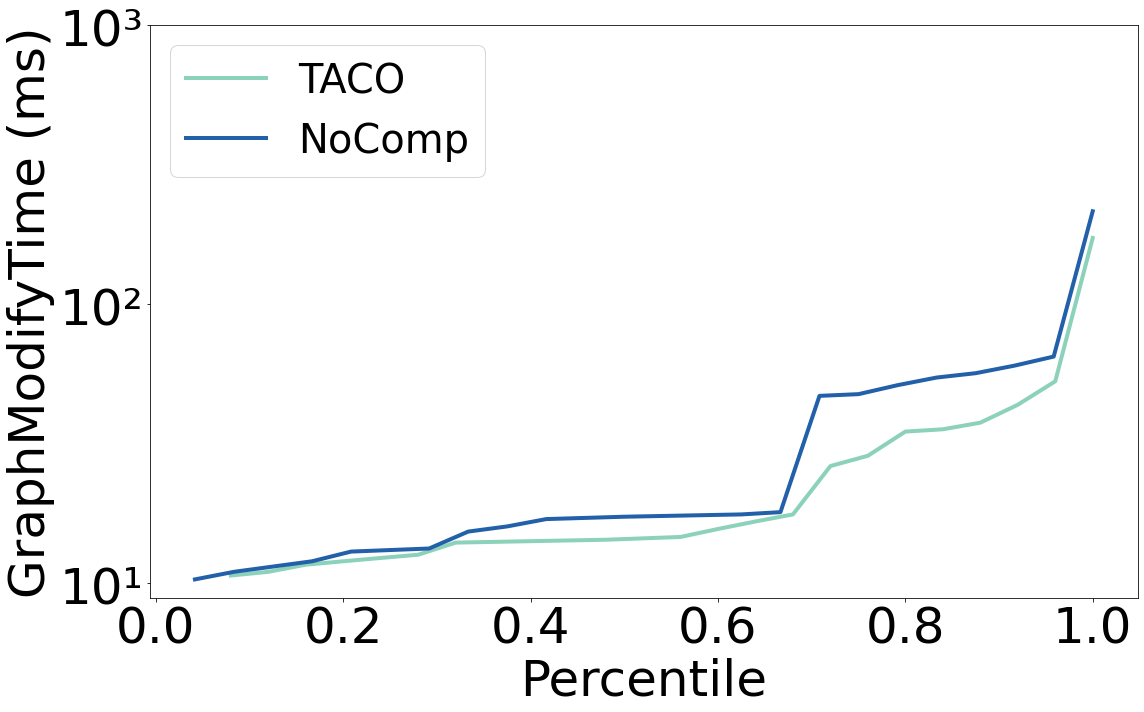

In [82]:
plot_percentile_transpose([freq_enron_taco_modify, freq_enron_nocomp_modify], 
                ["TACO", "NoComp"],
                ylabel="GraphModifyTime (ms)",
                xlabel="Percentile",
                y_tick_min=1,
                y_tick_max=3,
                y_tick_num=2,
                          save_path="./figures/enron_modify_compare.jpg"
               )

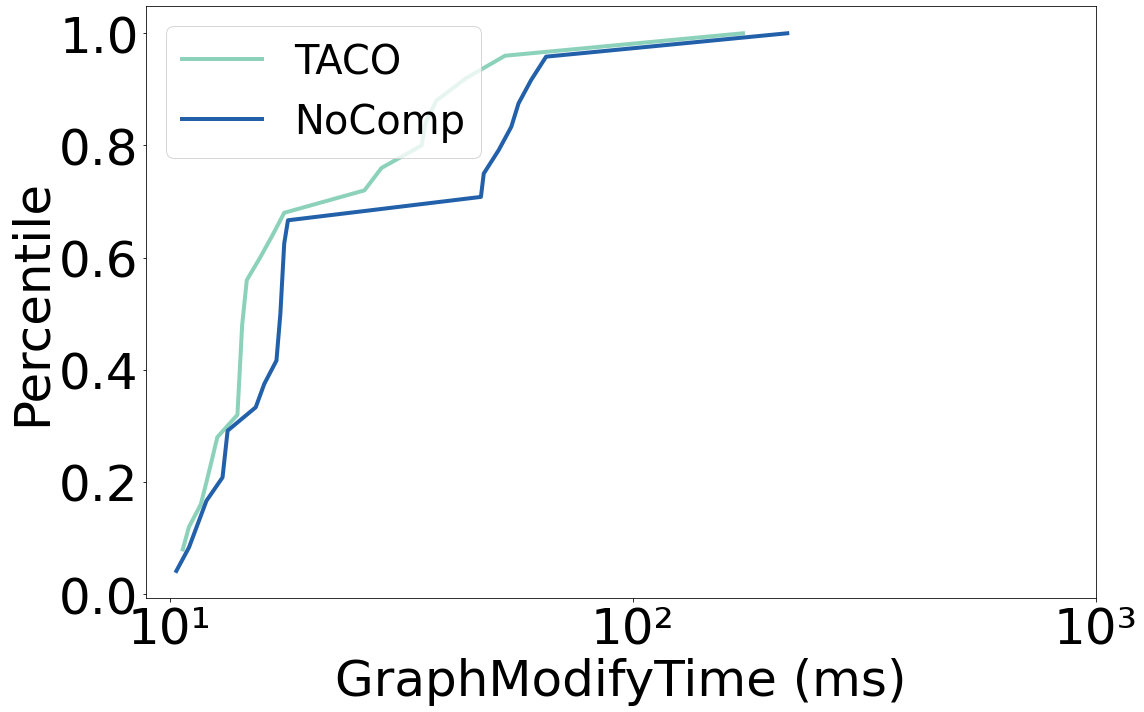

In [83]:
plot_percentile([freq_enron_taco_modify, freq_enron_nocomp_modify], 
                ["TACO", "NoComp"],
                xlabel="GraphModifyTime (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=3,
                x_tick_num=2,
                
               )

In [84]:
freq_github_taco_modify = get_pdf_df(github_taco_modify, 'GraphModifyTime', True)
freq_github_nocomp_modify = get_pdf_df(github_nocomp_modify, 'GraphModifyTime', True)

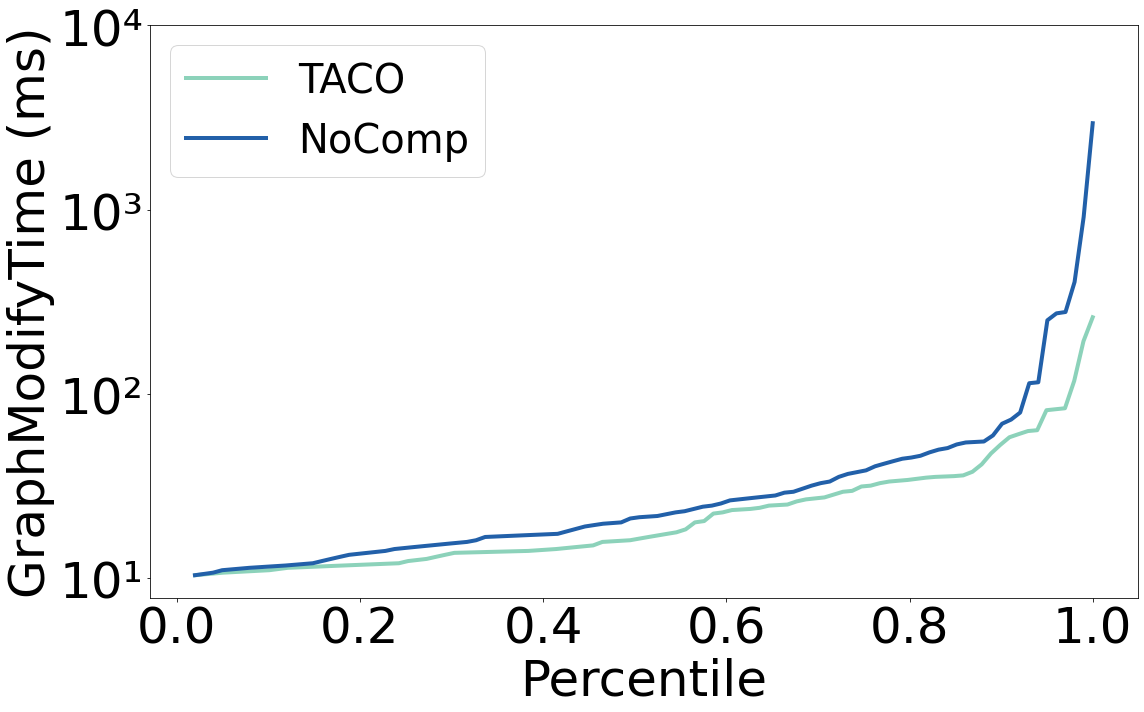

In [85]:
plot_percentile_transpose([freq_github_taco_modify, freq_github_nocomp_modify], 
                ["TACO", "NoComp"],
                ylabel="GraphModifyTime (ms)",
                xlabel="Percentile",
                y_tick_min=1,
                y_tick_max=4,
                y_tick_num=3,
                          save_path="./figures/github_modify_compare.jpg"
               )

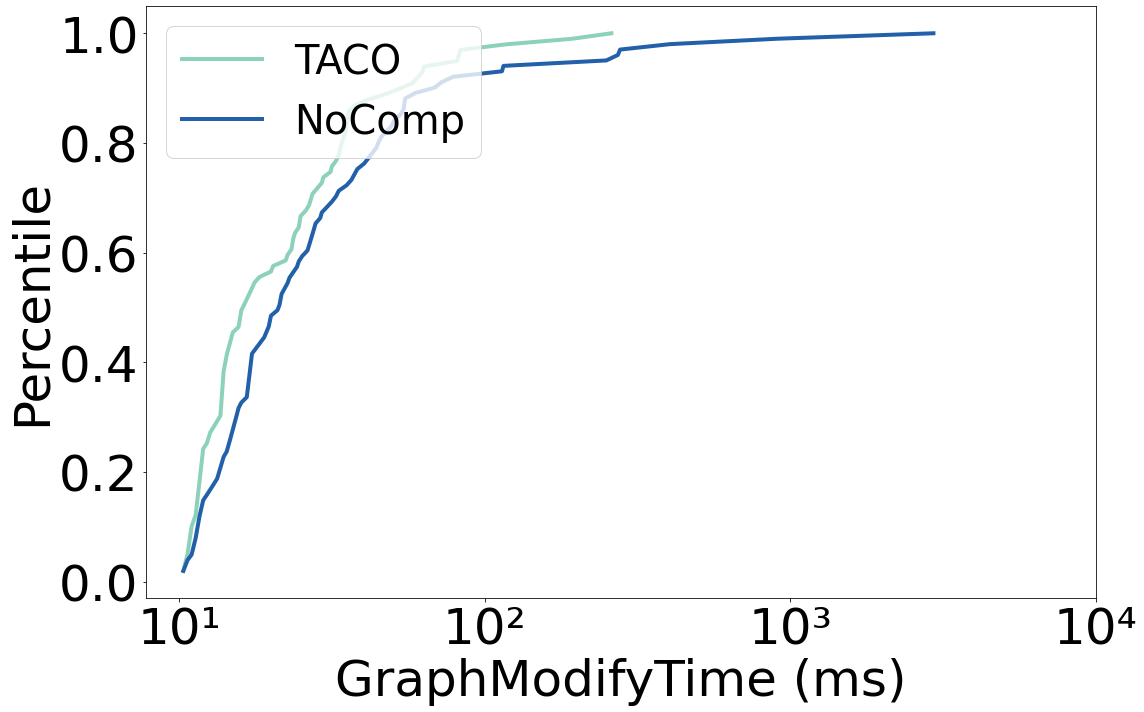

In [86]:
plot_percentile([freq_github_taco_modify, freq_github_nocomp_modify], 
                ["TACO", "NoComp"],
                xlabel="GraphModifyTime (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=4,
                x_tick_num=3
               )

## 5. Top10 Results

In [87]:
def dnf_process(df):
    column_name = ['LookupTime', 'GraphBuildTime', 'GraphModifyTime']
    column_name = [name for name in column_name if name in df.columns]
    MAX_TIME = 5 * 60 * 1000
    for i in range(len(df)):
        for name in column_name:
            if df.loc[i, name] == -1 or df.loc[i, name] >= MAX_TIME:
                df.loc[i, name] = MAX_TIME
    return df

### 5.1 Lookup Time

In [88]:
df_enron_merged['max_taco_time'] = df_enron_merged[['max_taco_time', 'long_taco_time']].T.max()
df_github_merged['max_taco_time'] = df_github_merged[['max_taco_time', 'long_taco_time']].T.max()
df_enron_merged['max_nocomp_time'] = df_enron_merged[['max_nocomp_time', 'long_nocomp_time']].T.max()
df_github_merged['max_nocomp_time'] = df_github_merged[['max_nocomp_time', 'long_nocomp_time']].T.max()

In [89]:
enron_lookup_top10 = df_enron_merged.sort_values(by="max_taco_time", ascending=False).head(10)[['fileName', 'max_taco_time', 'max_nocomp_time']]
github_lookup_top10 = df_github_merged.sort_values(by="max_taco_time", ascending=False).head(10)[['fileName', 'max_taco_time', 'max_nocomp_time']]

In [90]:
antifreeze_enron_lookup = pd.read_excel("./top10_results/enron_antifreeze_lookup_result.xlsx")
antifreeze_github_lookup = pd.read_excel("./top10_results/github_antifreeze_lookup_result.xlsx")

In [91]:
enron_lookup_compare = dnf_process(pd.merge(enron_lookup_top10, antifreeze_enron_lookup, on=["fileName"], how="inner"))
github_lookup_compare = dnf_process(pd.merge(github_lookup_top10, antifreeze_github_lookup, on=["fileName"], how="inner"))

In [92]:
lookup_compare = pd.concat([enron_lookup_compare, github_lookup_compare]).reset_index(drop=True)
lookup_compare

,fileName,max_taco_time,max_nocomp_time,LookupTime
0,joe_parks_000_1_1.pst.133.xls,68.000000,127.666667,300000
1,kevin_ruscitti_000_1_1.pst.125.xls,63.666667,53.666667,300000
2,jim_schwieger_000_1_1.pst.110.xls,42.666667,58.000000,300000
3,benjamin_rogers_001_1_1.pst.153.xls,42.000000,49.333333,300000
4,benjamin_rogers_000_1_1.pst.140.xls,40.333333,47.000000,300000
5,mark_haedicke_000_1_2.pst.31.xls,40.000000,335.333333,300000
6,vkaminski_001_1_2_1.pst.62.xls,40.000000,318.666667,300000
7,gerald_nemec_000_1_1.pst.11.xls,35.000000,39.666667,300000
8,jeff_dasovich_000_1_1_1.pst.138.xls,32.333333,34.666667,300000
9,benjamin_rogers_000_1_1.pst.190.xls,29.333333,39.000000,300000


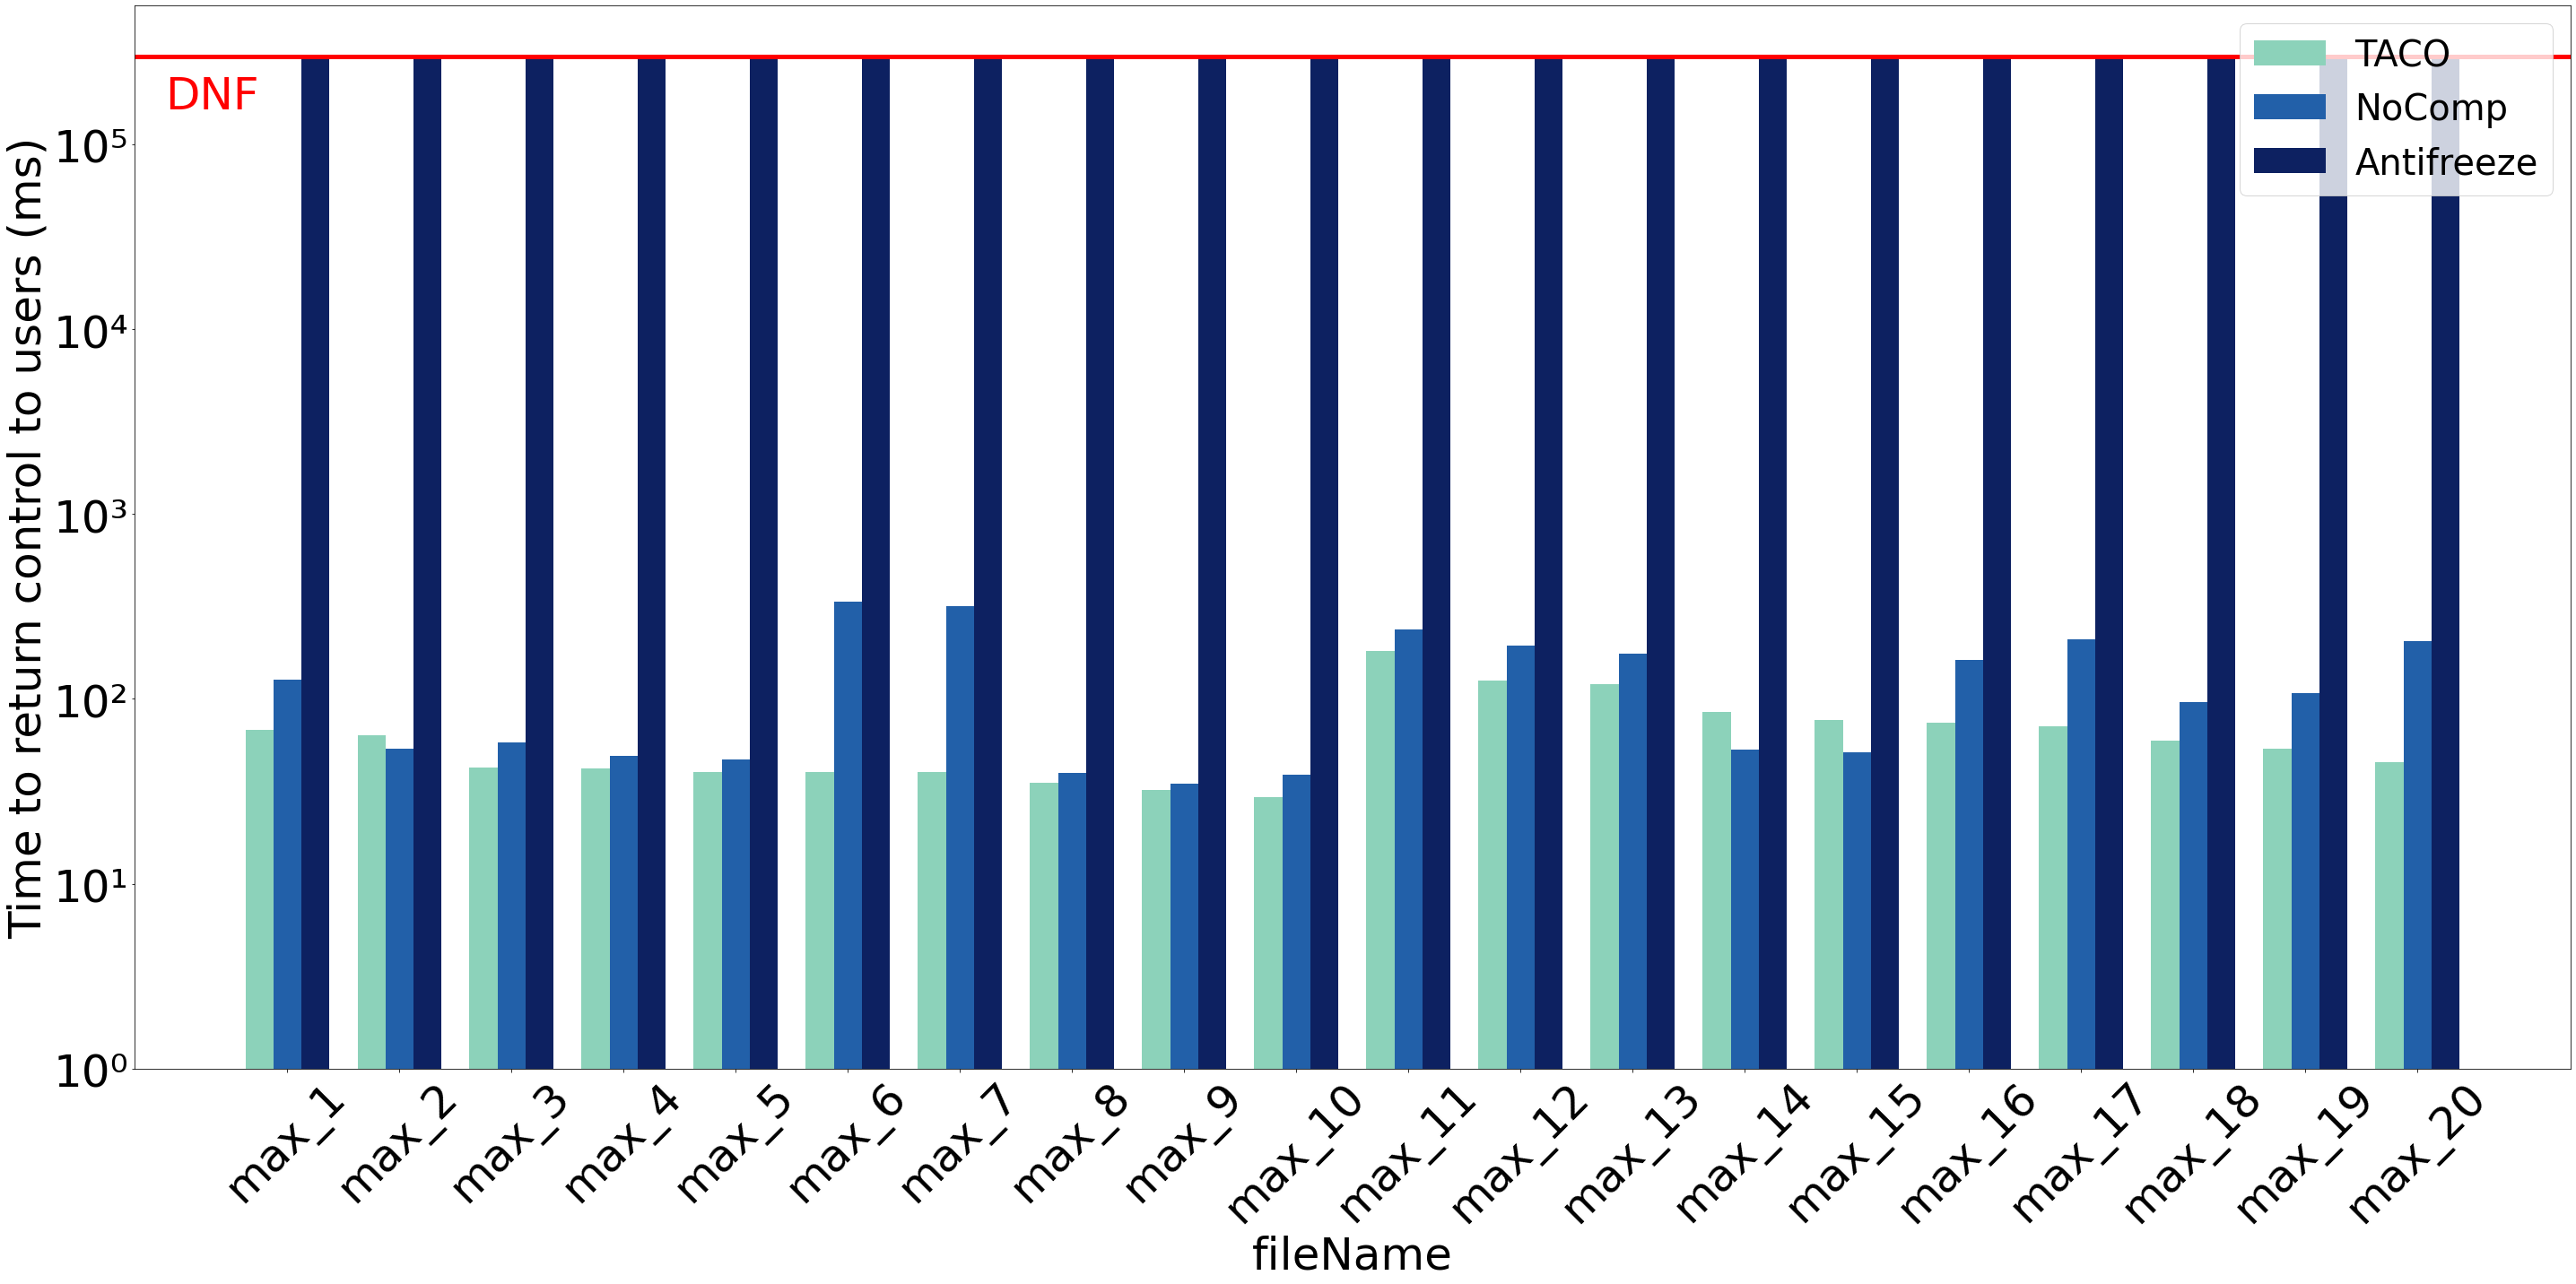

In [135]:
plot_bar_chart(lookup_compare, 
               ["max_" + str(i+1) for i in range(len(modify_compare))],
               label_column_dict={"TACO": "max_taco_time", "NoComp": "max_nocomp_time", "Antifreeze": "LookupTime"},
               xlabel="fileName",
               ylabel="Time to return control to users (ms)",
               y_tick_min=0,
               y_tick_max=5,
               y_tick_num=5,
               fig_size=(40, 20)
              )

### 5.2 Graph Build Time

In [94]:
enron_graph_top10 = enron_graph_result.sort_values(by="TACO_GraphBuildTime", ascending=False).head(10)
github_graph_top10 = github_graph_result.sort_values(by="TACO_GraphBuildTime", ascending=False).head(10)

In [95]:
antifreeze_enron_build = pd.read_excel("./top10_results/enron_antifreeze_graphbuild_result.xlsx")
antifreeze_github_build = pd.read_excel("./top10_results/github_antifreeze_graphbuild_result.xlsx")

In [96]:
enron_graph_compare = dnf_process(pd.merge(enron_graph_top10, antifreeze_enron_build, on=["fileName"], how="inner"))
github_graph_compare = dnf_process(pd.merge(github_graph_top10, antifreeze_github_build, on=["fileName"], how="inner"))

In [97]:
graph_compare = pd.concat([enron_graph_compare, github_graph_compare]).reset_index(drop=True)
graph_compare

,fileName,TACO_GraphBuildTime,NoComp_GraphBuildTime,GraphBuildTime
0,vkaminski_001_1_2_1.pst.62.xls,13329.0,1668.5,300000.0
1,mark_haedicke_000_1_2.pst.31.xls,5973.0,1762.5,300000.0
2,gstorey_000_1_1.pst.116.xls,5715.5,2565.5,205079.3
3,john_lavorato_000_1_1_1.pst.57.xls,5485.5,1727.0,137009.0
4,phillip_m_love_000_1_1.pst.476.xls,5211.5,1605.0,300000.0
5,harry_arora_000_1_1.pst.130.xls,5032.0,2755.5,300000.0
6,jim_schwieger_000_1_1.pst.111.xls,4637.5,1081.0,300000.0
7,vkaminski_002_1_1_1.pst.12.xls,4335.0,1948.5,300000.0
8,kam_keiser_000_1_1.pst.16.xls,4200.0,1305.5,300000.0
9,joe_parks_000_1_1.pst.133.xls,3920.0,954.0,300000.0


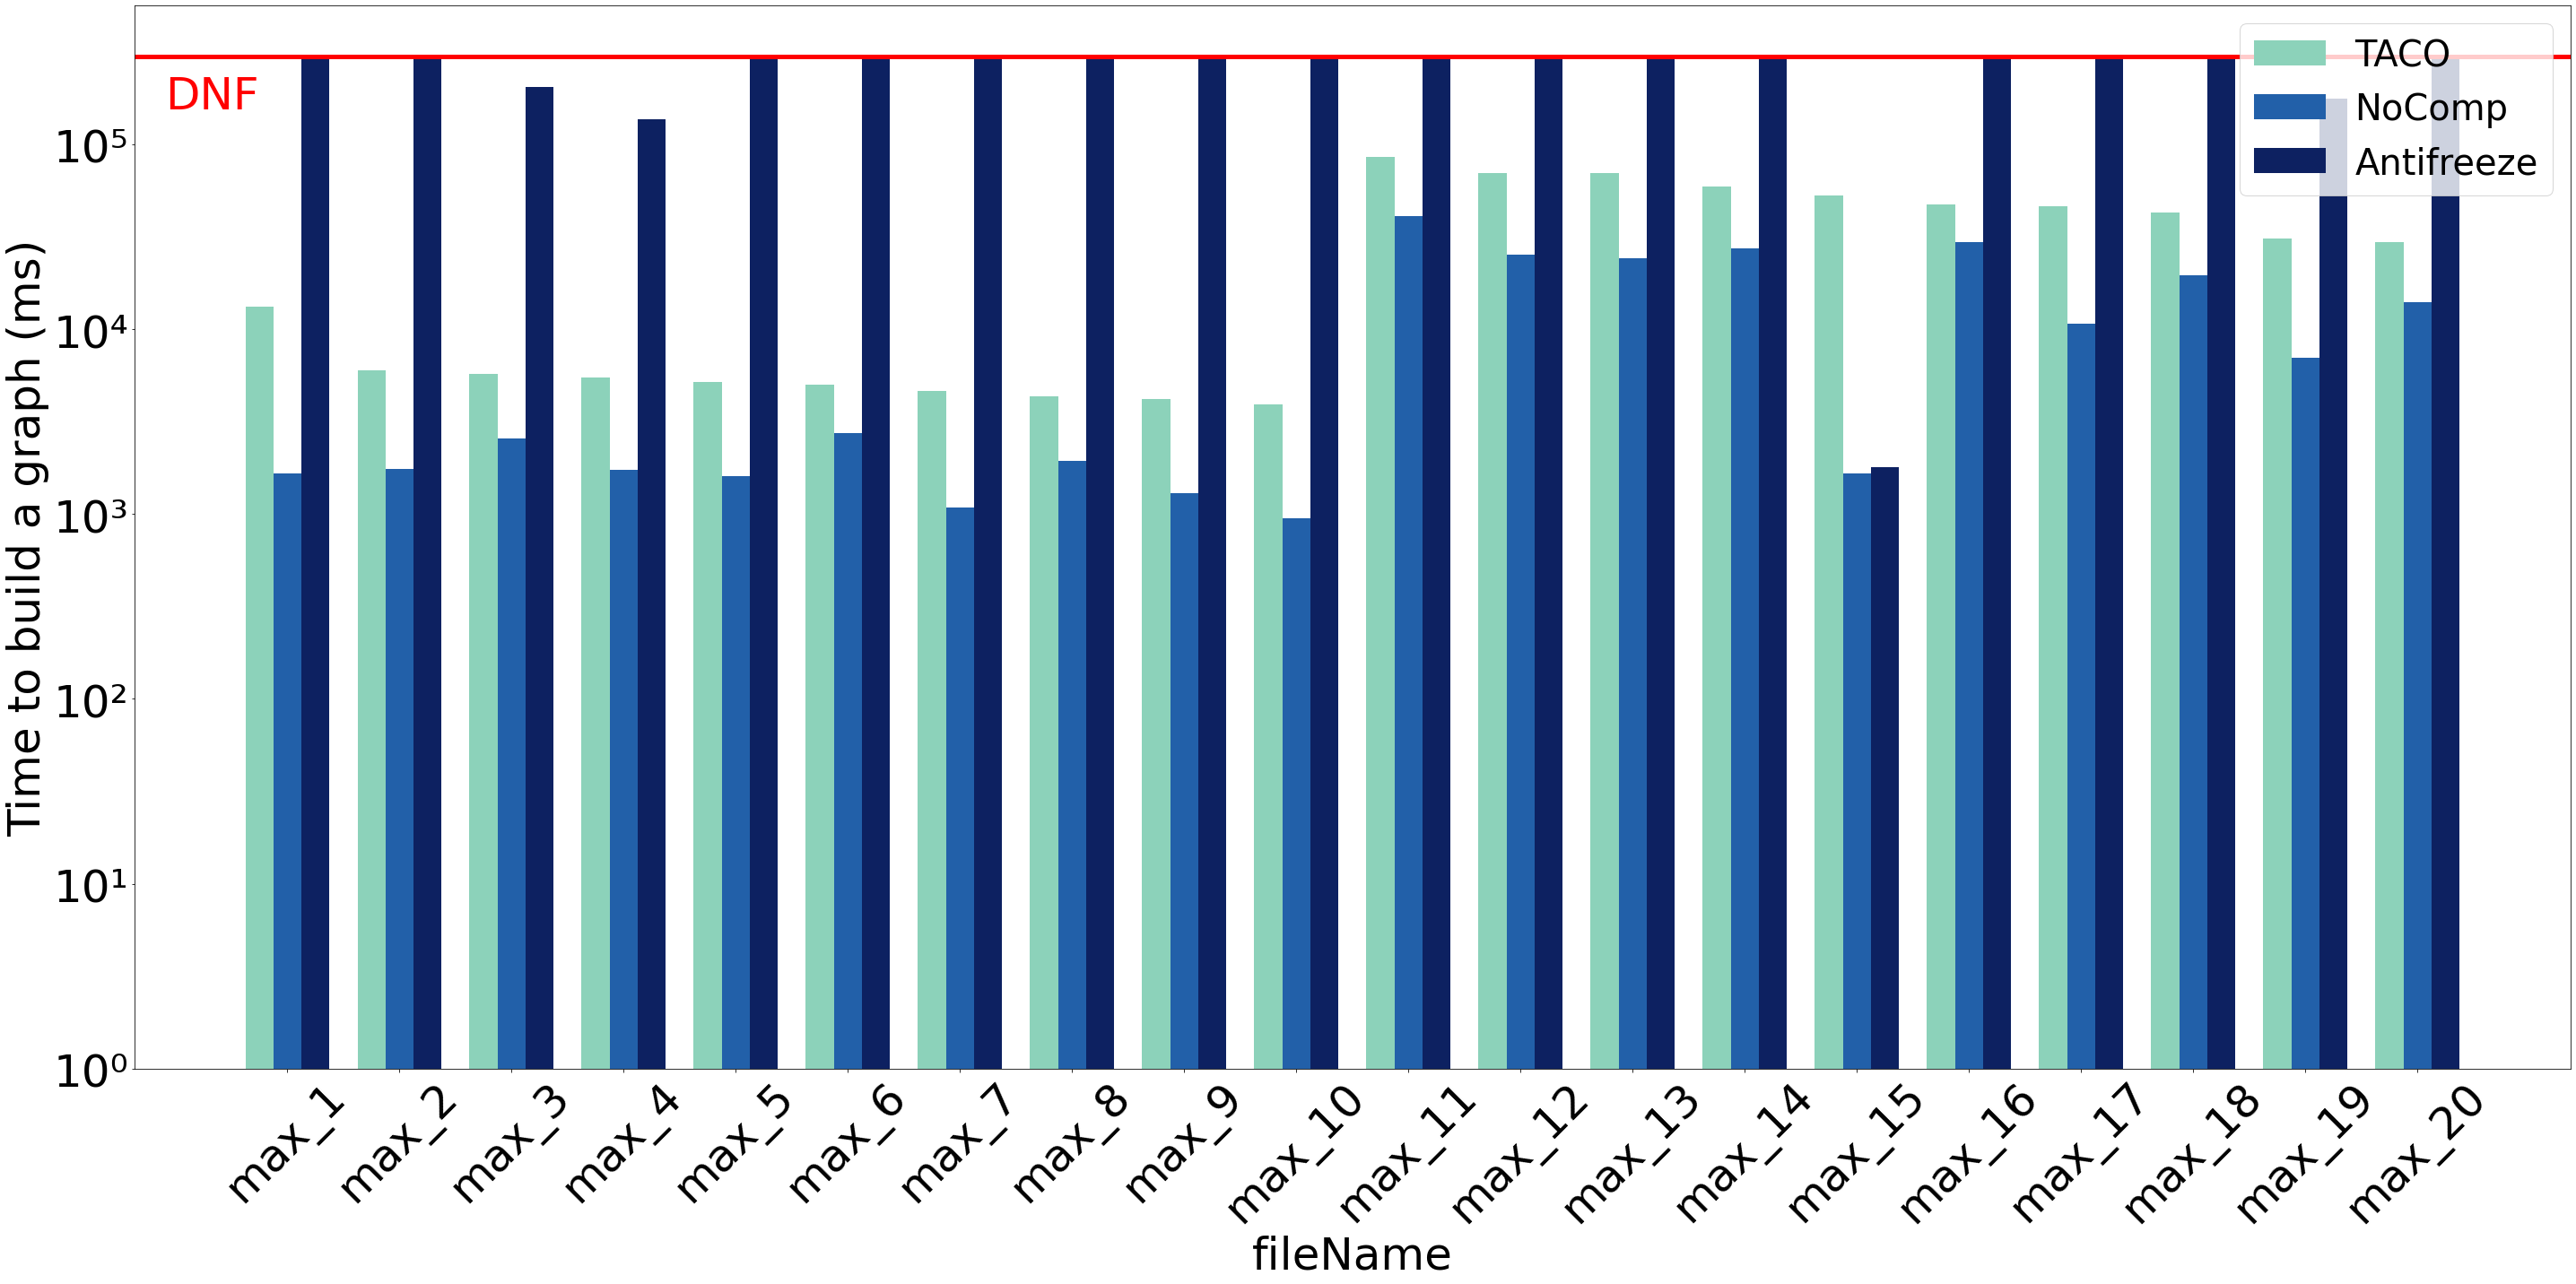

In [136]:
plot_bar_chart(graph_compare, 
               ["max_" + str(i+1) for i in range(len(modify_compare))],
               label_column_dict={"TACO": "TACO_GraphBuildTime", "NoComp": "NoComp_GraphBuildTime", "Antifreeze": "GraphBuildTime"},
               xlabel="fileName",
               ylabel="Time to build a graph (ms)",
               y_tick_min=0,
               y_tick_max=5,
               y_tick_num=5,
               fig_size=(40, 20)
              )

### 5.3 Graph Modify Time

In [98]:
enron_taco_modify = enron_taco_modify.rename(columns={"GraphModifyTime": "TACO_GraphModifyTime"})
github_taco_modify = github_taco_modify.rename(columns={"GraphModifyTime": "TACO_GraphModifyTime"})
enron_nocomp_modify = enron_nocomp_modify.rename(columns={"GraphModifyTime": "NoComp_GraphModifyTime"})
github_nocomp_modify = github_nocomp_modify.rename(columns={"GraphModifyTime": "NoComp_GraphModifyTime"})

In [99]:
enron_modify_merged = pd.merge(enron_taco_modify, enron_nocomp_modify, on=["fileName"], how="inner")[['fileName', 'TACO_GraphModifyTime', 'NoComp_GraphModifyTime']]
github_modify_merged = pd.merge(github_taco_modify, github_nocomp_modify, on=["fileName"], how="inner")[['fileName', 'TACO_GraphModifyTime', 'NoComp_GraphModifyTime']]

In [100]:
antifreeze_enron_modify = pd.read_excel("./top10_results/enron_antifreeze_modify_results.xlsx")
antifreeze_github_modify = pd.read_excel("./top10_results/github_antifreeze_modify_results.xlsx")

In [101]:
enron_modify_compare = dnf_process(pd.merge(enron_modify_merged, antifreeze_enron_modify, on=["fileName"], how="inner"))
github_modify_compare = dnf_process(pd.merge(github_modify_merged, antifreeze_github_modify, on=["fileName"], how="inner"))

In [102]:
modify_compare = pd.concat([enron_modify_compare, github_modify_compare]).reset_index(drop=True)
modify_compare

,fileName,TACO_GraphModifyTime,NoComp_GraphModifyTime,GraphModifyTime
0,john_lavorato_000_1_1_1.pst.57.xls,16.666667,10.333333,113587.7
1,joe_parks_000_1_1.pst.133.xls,17.666667,5.333333,300000.0
2,vkaminski_002_1_1_1.pst.12.xls,53.000000,60.333333,300000.0
3,vkaminski_002_1_1_1.pst.10.xls,43.666667,56.666667,300000.0
4,vkaminski_001_1_2_1.pst.62.xls,173.000000,65.000000,300000.0
5,tracy_geaccone_000_1_1.pst.417.xls,26.333333,10.000000,43369.7
6,sally_beck_002_1_1_1.pst.5.xls,35.666667,47.000000,6967.7
7,jim_schwieger_000_1_1.pst.110.xls,28.666667,6.333333,300000.0
8,vkaminski_000_1_1_1.pst.27.xls,37.666667,54.666667,300000.0
9,sally_beck_002_1_1_1.pst.3.xls,35.000000,47.666667,6773.3


<ipython-input-133-478f878a8b37>:28: RuntimeWarning: divide by zero encountered in log10
  np.log10(df[label_column_dict[bar_label]].values),


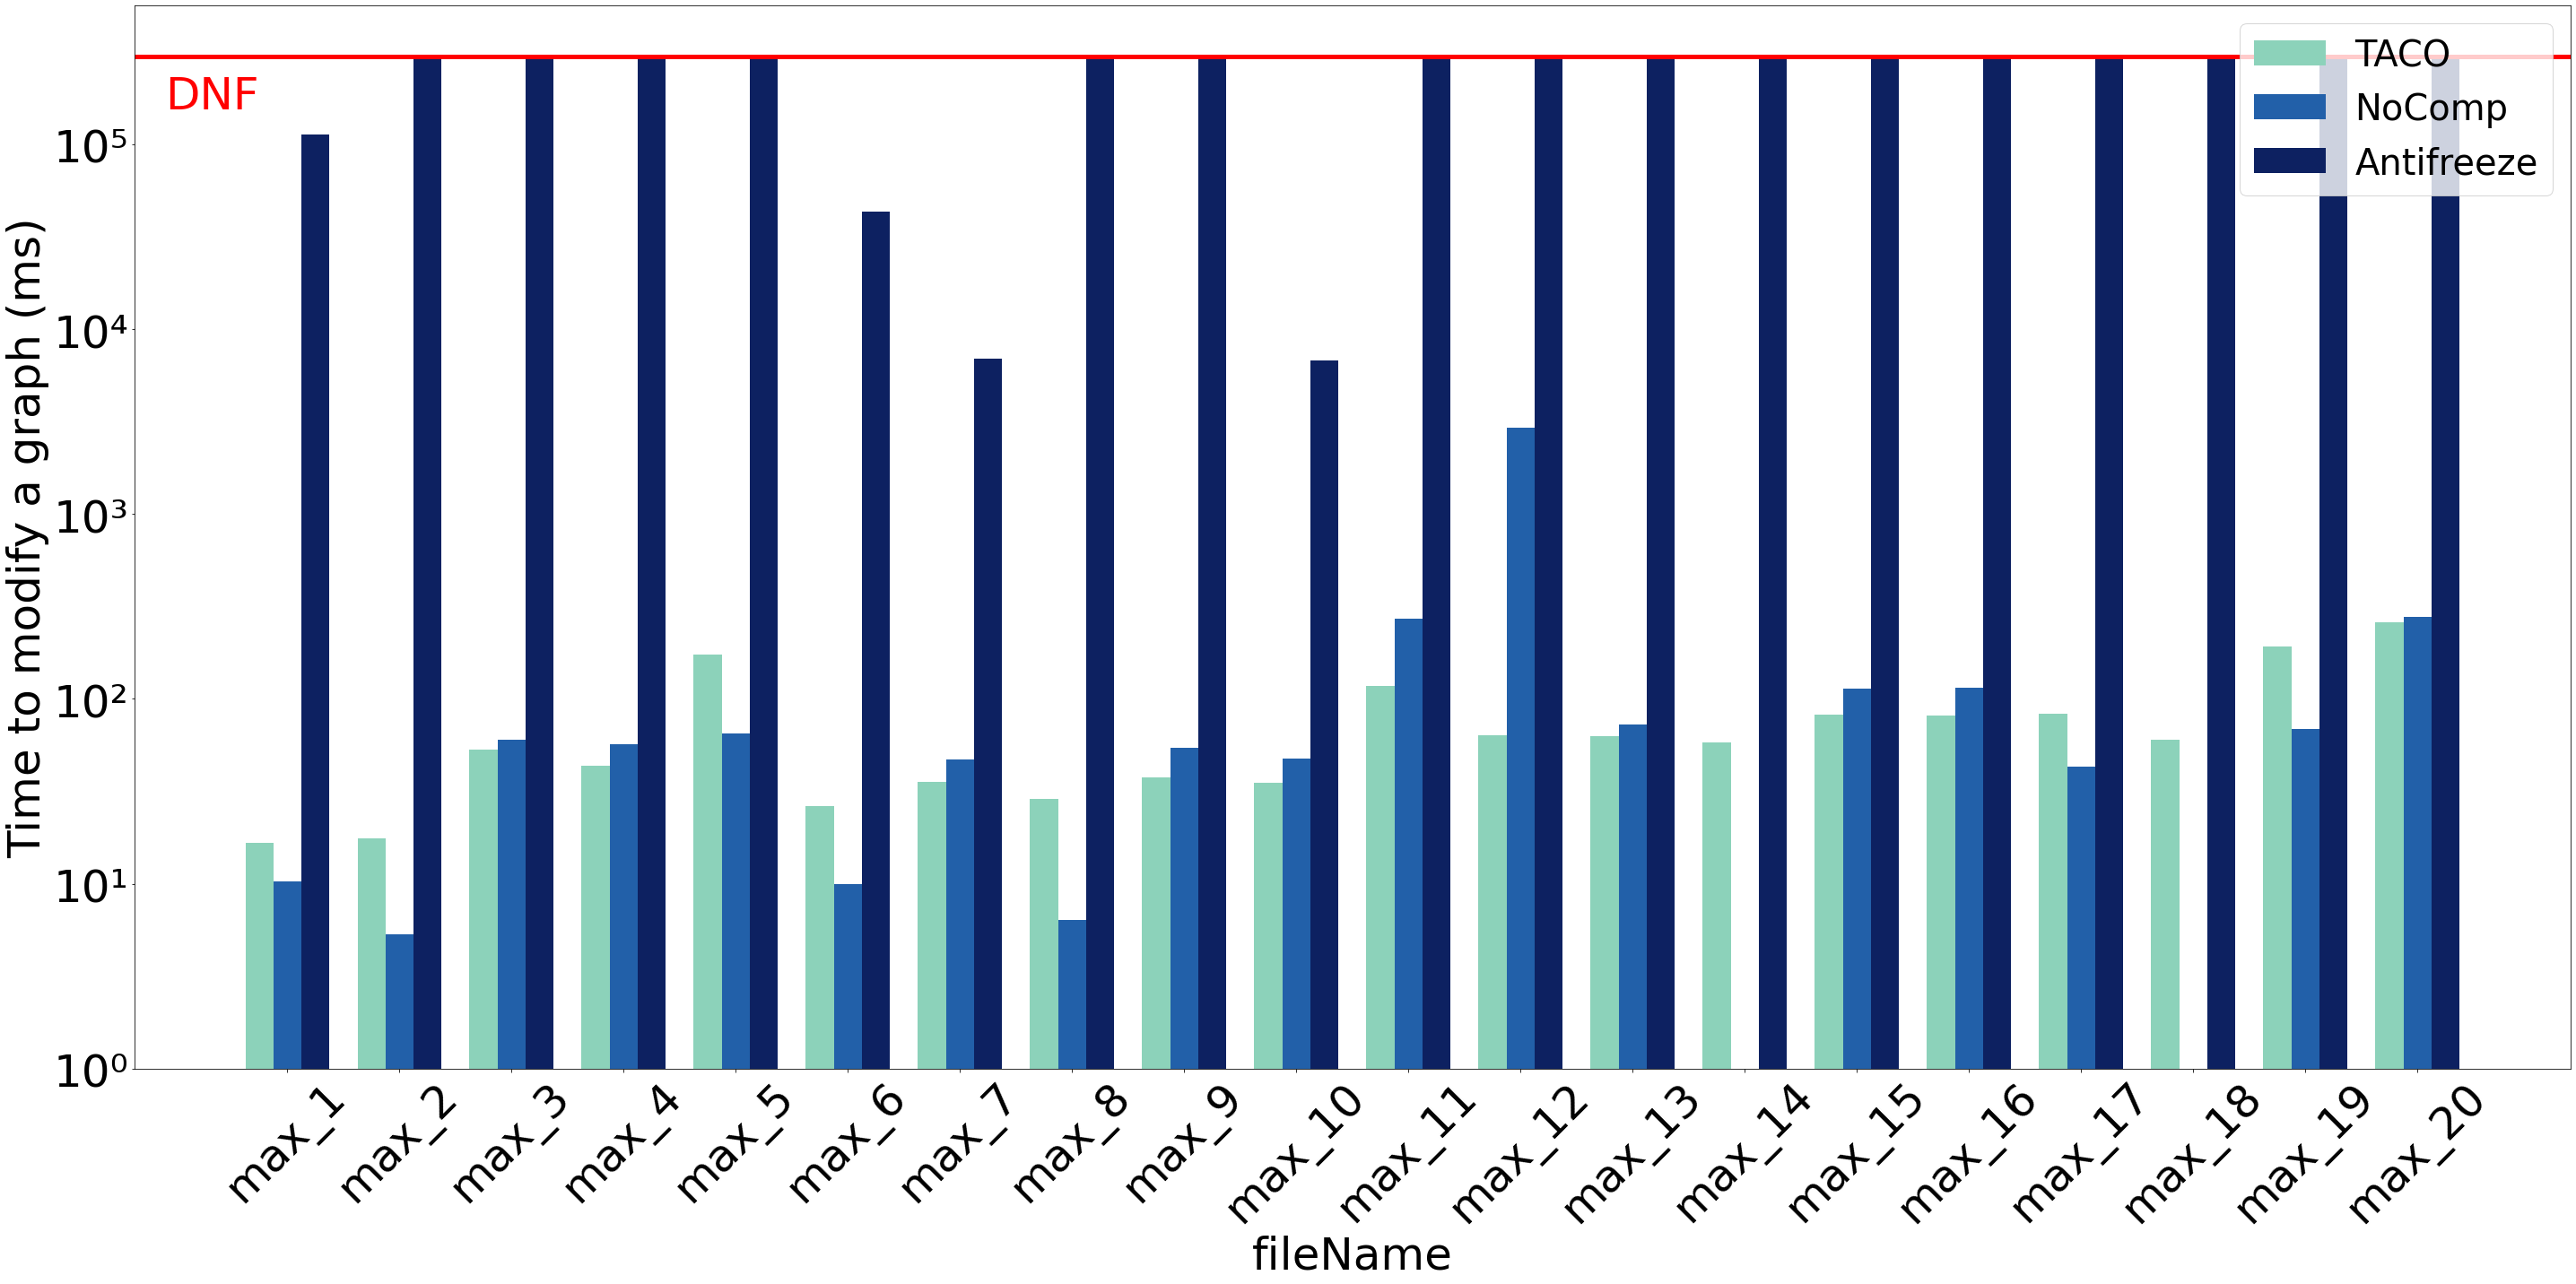

In [137]:
plot_bar_chart(modify_compare, 
               ["max_" + str(i+1) for i in range(len(modify_compare))],
               label_column_dict={"TACO": "TACO_GraphModifyTime", "NoComp": "NoComp_GraphModifyTime", "Antifreeze": "GraphModifyTime"},
               xlabel="fileName",
               ylabel="Time to modify a graph (ms)",
               y_tick_min=0,
               y_tick_max=5,
               y_tick_num=5,
               fig_size=(40, 20)
              )